🎯 프로젝트 개요

주제: 음성 데이터의 다양한 음향 특성(Acoustic Features) 을 분석해
‘angry’, ‘happy’, ‘relax’, ‘sad’ 4가지 감정을 분류하는 모델을 만드는 것.

🧩 주요 과정

데이터셋 준비

음성에서 추출한 여러 feature(예: pitch, intensity, spectral_centroid 등)

각 데이터에 감정 레이블(Class: 0~3)

전처리

결측치 처리, 스케일링, 정규화

필요 없는 feature 제거

특성 선택 (Feature Selection)

상관분석, RandomForest importance, XAI 등으로 중요변수 30개 선정

차원 축소 시각화

t-SNE, UMAP으로 2D embedding → 감정별 군집 분포 확인
(너희가 최근에 그린 게 바로 이 부분!)

모델 학습

감정 분류 모델 (예: RandomForest, SVM, etc.)

성능 평가 (정확도, F1-score 등)

설명가능한 AI (XAI)

SHAP, LIME, PDP 등으로 어떤 feature가 감정 예측에 영향을 주는지 해석

결과 시각화

중요 변수 30개 분포(히스토그램)

감정별 t-SNE / UMAP 분포

confusion matrix 등

🧠 목표

“음성의 수치적 특성만으로 감정이 어느 정도 분류 가능한가?”
“감정별로 특징적으로 높은/낮은 음향 특성은 무엇인가?”
→ 즉, 데이터 기반 감정 인식 모델을 이해하고 시각적으로 보여주는 게 핵심입니다.

💬 한 줄로 요약

음성에서 추출한 30개의 주요 음향 특성(feature) 을 기반으로
감정을 분류하고 시각화하는 데이터 사이언스 프로젝트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 연결
drive.mount('/content/drive')

# 파일 경로 지정
path = '/content/Acoustic Features.csv'

# 엑셀 파일 불러오기
df = pd.read_csv(path)

# 상위 5행 확인
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [ ]:
df.columns

Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12

In [ ]:
df['Class'].unique()

array(['relax', 'happy', 'sad', 'angry'], dtype=object)

**데이터 전처리**

In [ ]:
import pandas as pd

df = pd.read_csv("Acoustic Features.csv")
df.columns = [c.lstrip('_').strip() for c in df.columns]

# 각 컬럼별 결측치 비율(%)
missing_ratio = df.isnull().mean() * 100
print(missing_ratio.sort_values(ascending=False))

# 전체 평균 결측치 비율
print("\n전체 평균 결측치 비율: {:.2f}%".format(df.isnull().mean().mean() * 100))


Class                                            0.0
RMSenergy_Mean                                   0.0
Lowenergy_Mean                                   0.0
Fluctuation_Mean                                 0.0
Tempo_Mean                                       0.0
MFCC_Mean_1                                      0.0
MFCC_Mean_2                                      0.0
MFCC_Mean_3                                      0.0
MFCC_Mean_4                                      0.0
MFCC_Mean_5                                      0.0
MFCC_Mean_6                                      0.0
MFCC_Mean_7                                      0.0
MFCC_Mean_8                                      0.0
MFCC_Mean_9                                      0.0
MFCC_Mean_10                                     0.0
MFCC_Mean_11                                     0.0
MFCC_Mean_12                                     0.0
MFCC_Mean_13                                     0.0
Roughness_Mean                                

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1) load
df = pd.read_csv('/content/Acoustic Features.csv')

# 2) column name 앞에 붙은 "_" 제거
df.columns = [c.lstrip('_') for c in df.columns]

# 3) Class label encode
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# 확인
print(df.head())
print(df.info())

   Class  RMSenergy_Mean  Lowenergy_Mean  Fluctuation_Mean  Tempo_Mean  \
0      2           0.052           0.591             9.136     130.043   
1      2           0.125           0.439             6.680     142.240   
2      2           0.046           0.639            10.578     188.154   
3      2           0.135           0.603            10.442      65.991   
4      2           0.066           0.591             9.769      88.890   

   MFCC_Mean_1  MFCC_Mean_2  MFCC_Mean_3  MFCC_Mean_4  MFCC_Mean_5  ...  \
0        3.997        0.363        0.887        0.078        0.221  ...   
1        4.058        0.516        0.785        0.397        0.556  ...   
2        2.775        0.903        0.502        0.329        0.287  ...   
3        2.841        1.552        0.612        0.351        0.011  ...   
4        3.217        0.228        0.814        0.096        0.434  ...   

   Chromagram_Mean_9  Chromagram_Mean_10  Chromagram_Mean_11  \
0              0.426               1.000

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1) csv load
df = pd.read_csv('Acoustic Features.csv')    # 너 로컬 경로에 맞게 수정

# 2) 컬럼명 앞에 언더바 제거
df.columns = [c.lstrip('_') for c in df.columns]

# 3) Class 라벨 인코딩
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# 4) 저장
df.to_csv('acoustic_preprocessed.csv', index=False)

print("✅ saved: acoustic_preprocessed.csv")


✅ saved: acoustic_preprocessed.csv


In [38]:
plt.rcParams.update({
    'font.size': 13,        # 기본 폰트 크기
    'axes.titlesize': 15,   # 제목 크기
    'axes.labelsize': 13,   # 축 라벨
    'xtick.labelsize': 11,  # 축 눈금
    'ytick.labelsize': 11,  # 축 눈금
    'legend.fontsize': 11,  # 범례 폰트
    'figure.dpi': 150       # 해상도 높이기
})


**랜덤 포레스트 생성 -> 변수중요도가 높은 변수 30개 골라내기**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1) 데이터 로드
df = pd.read_csv("/content/Acoustic Features.csv")  # 경로 OK

# 2) 컬럼명 정리: 앞쪽 '_' 제거 + strip
df.columns = [c.lstrip('_').strip() for c in df.columns]

# 3) 타깃(Label) 인코딩
if df['Class'].dtype == object:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])
    label_mapping = {cls: int(i) for i, cls in enumerate(le.classes_)}
    print("Label mapping:", label_mapping)

# 4) (옵션) 중복 통계 변수 드랍 (Mean 위주로 두고 SD/Var 제거)
drop_cols = [c for c in df.columns
             if ('MFCC_SD' in c or 'MFCC_Var' in c or
                 'Chromagram_SD' in c or 'Chromagram_Var' in c)]
df = df.drop(columns=drop_cols)

# 5) 특성만 숫자형으로 보장 (문자 있으면 숫자로 변환, 실패시 NaN)
feature_cols = [c for c in df.columns if c != 'Class']
df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')

# 6) 결측치 간단 처리(중앙값 대체) — 모델 돌리기 위해 최소한의 처리
df[feature_cols] = df[feature_cols].fillna(df[feature_cols].median())

# 7) 분리
X = df.drop(columns=['Class'])
y = df['Class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8) 랜덤포레스트 학습
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# 9) 중요도 상위 30개 선택
feat_imp = (pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
            .sort_values('importance', ascending=False)
            .reset_index(drop=True))
top30 = feat_imp.head(30)
print(top30)

# 10) 저장
top30.to_csv("/content/top30_rf_features.csv", index=False)
selected_cols = top30['feature'].tolist()
df[selected_cols + ['Class']].to_csv("/content/acoustic_top30_rf.csv", index=False)

print("Saved: /content/top30_rf_features.csv, /content/acoustic_top30_rf.csv")



Label mapping: {'angry': 0, 'happy': 1, 'relax': 2, 'sad': 3}
                                          feature  importance
0             HarmonicChangeDetectionFunction_Std    0.086680
1       HarmonicChangeDetectionFunction_PeriodAmp    0.084641
2                          Zero-crossingrate_Mean    0.079076
3                                Fluctuation_Mean    0.054338
4                               Pulseclarity_Mean    0.041342
5                               Eventdensity_Mean    0.038815
6            HarmonicChangeDetectionFunction_Mean    0.038514
7                          EntropyofSpectrum_Mean    0.038455
8                                     MFCC_Mean_2    0.033435
9                                 Brightness_Mean    0.029624
10                                AttackTime_Mean    0.025032
11                                    MFCC_Mean_4    0.021227
12                                    MFCC_Mean_1    0.018657
13                              Chromagram_Mean_7    0.017558
14      

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
# (선택) 퍼뮤테이션 임포턴스
from sklearn.inspection import permutation_importance

print("\n=== A) Class distribution ===")
print(y.value_counts(normalize=True))

# 기존 전체 피처로 성능 확인
y_pred = rf.predict(X_test)
print("\n=== B) Full-features Test performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === C) Top30 피처로 재학습 & 평가 ===
selected_cols = top30['feature'].tolist()

# ✅ DataFrame 방식 (추천: 열 이름으로 안전하게)
X_train_30 = X_train.loc[:, selected_cols]
X_test_30  = X_test.loc[:, selected_cols]

rf_30 = RandomForestClassifier(
    n_estimators=500, max_depth=None, max_features="sqrt",
    n_jobs=-1, random_state=42
)
rf_30.fit(X_train_30, y_train)
y_pred_30 = rf_30.predict(X_test_30)

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print("\n=== Top30-features Test performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_30))
print("Macro F1 :", f1_score(y_test, y_pred_30, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_30))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_30))

# (선택) 교차검증으로 안정성 보기
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    rf_30, np.vstack([X_train_30, X_test_30]),
    np.hstack([y_train, y_test]),
    cv=skf, scoring='f1_macro', n_jobs=-1
)
print("\nCV Macro F1 (Top30):", cv_scores, "mean:", cv_scores.mean())

# (선택) 퍼뮤테이션 임포턴스: Top30 모델 해석 안정성 확인
perm = permutation_importance(
    rf_30, X_test_30, y_test, scoring='f1_macro',
    n_repeats=10, random_state=42, n_jobs=-1
)
perm_imp = (
    pd.DataFrame({'feature': selected_cols, 'perm_importance_mean': perm.importances_mean})
      .sort_values('perm_importance_mean', ascending=False)
      .reset_index(drop=True)
)
print("\nPermutation Importance (Top30) head:")
print(perm_imp.head(15))



=== A) Class distribution ===
Class
2    0.25
1    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

=== B) Full-features Test performance ===
Accuracy: 0.7375
Macro F1 : 0.7299741602067182

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.80      1.00      0.89        20
           2       0.65      0.75      0.70        20
           3       0.62      0.50      0.56        20

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.73        80
weighted avg       0.74      0.74      0.73        80

Confusion Matrix:
 [[14  3  1  2]
 [ 0 20  0  0]
 [ 0  1 15  4]
 [ 2  1  7 10]]

=== Top30-features Test performance ===
Accuracy: 0.775
Macro F1 : 0.7687997193811148

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.83      1.00      0.

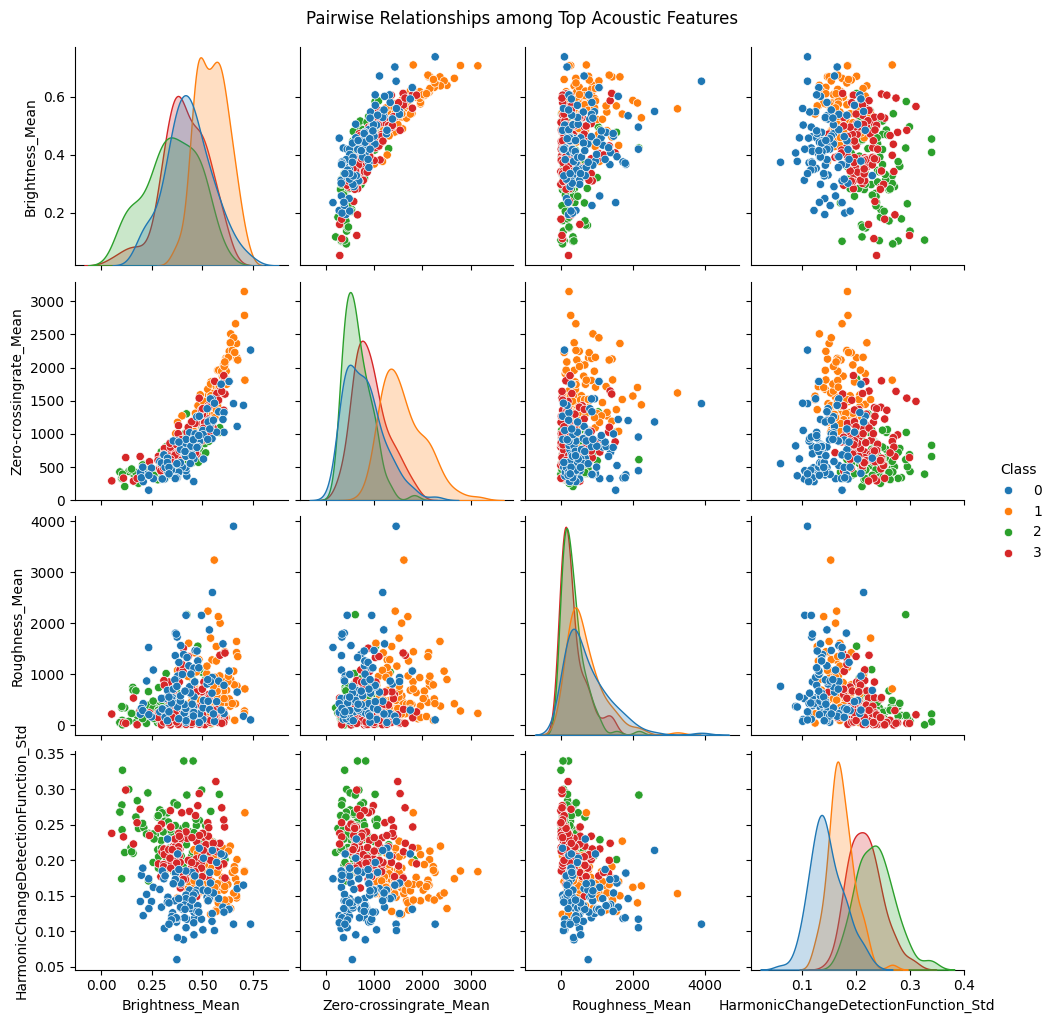

In [ ]:
##pairplot(변수 간 관계&감정별 클러스터)
## -> 감정별로 데이터가 실제로 분리되는지 직관적으로 볼 수 있음
import matplotlib.pyplot as plt
import seaborn as sns
top_feats = ['Brightness_Mean', 'Zero-crossingrate_Mean',
             'Roughness_Mean', 'HarmonicChangeDetectionFunction_Std']
sns.pairplot(df[top_feats + ['Class']], hue='Class', palette='tab10')
plt.suptitle("Pairwise Relationships among Top Acoustic Features", y=1.02)
plt.show()


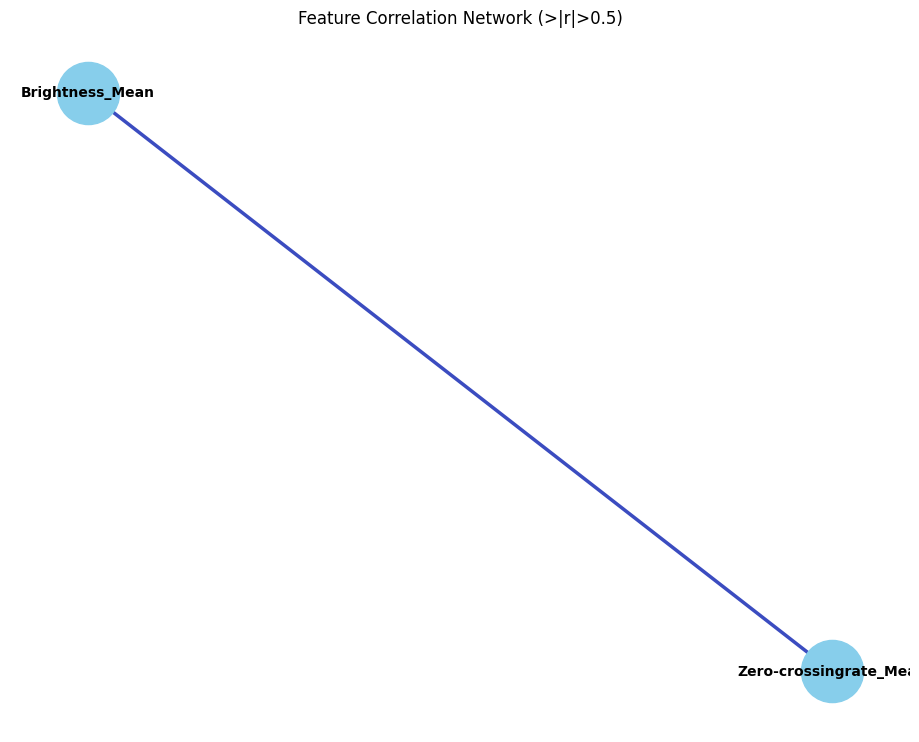

In [ ]:
##correlation network graph
##변수간 상관관계를 네트워크 형태로 표현 -> 유사한 특성 그룹을 시각적으로 연결구조로 보여줌
##이건 애매띠....

import networkx as nx
import matplotlib.pyplot as plt

corr = df[top_feats].corr()
G = nx.Graph()
threshold=0.5
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i,j]) > threshold:
            G.add_edge(i, j, weight=corr.loc[i,j])

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

plt.figure(figsize=(9,7))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_color='skyblue',
    edge_color=weights,
    width=[abs(w)*3 for w in weights],  # 강한 상관일수록 두껍게
    edge_cmap=plt.cm.coolwarm,           # 빨강–파랑으로 색상 표현
    node_size=2000,
    font_size=10,
    font_weight='bold'
)

plt.title(f"Feature Correlation Network (>|r|>{threshold})")
plt.show()



In [ ]:
# -*- coding: utf-8 -*-
"""
Top30 중요변수 히트맵 생성 스크립트
- 입력: Acoustic Features.csv (원본)
- 처리: 컬럼명 정리, Class 레이블 인코딩, RF 중요도 산출 후 Top30 선택
- 출력:
    1) top30_feature_correlation_heatmap.png (상관 히트맵)
    2) top30_class_mean_zscore_heatmap.png (클래스별 평균 z-점수 히트맵)
    3) top30_feature_correlation_matrix.csv (상관행렬 CSV)
    4) top30_class_mean_zscore.csv (클래스별 평균 z-점수 CSV)
    5) top30_rf_features_list.csv (Top30 변수/중요도 리스트)
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# =========================
# 0) 경로 설정
# =========================
# Colab이면 "/content/Acoustic Features.csv" 로 바꿔줘도 됨
CSV_PATH = "Acoustic Features.csv"
OUT_DIR  = "artifacts_heatmaps"
os.makedirs(OUT_DIR, exist_ok=True)

# =========================
# 1) 데이터 로드 & 전처리 (컬럼명/타깃 인코딩)
# =========================
df = pd.read_csv(CSV_PATH)
# 앞쪽 '_' 제거 + 공백 제거
df.columns = [c.lstrip('_').strip() for c in df.columns]

# Label encoding (Class가 문자열인 경우)
if df['Class'].dtype == object:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

# =========================
# 2) Train/Test split (RF 중요도 산출용)
# =========================
X = df.drop(columns=['Class'])
y = df['Class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 3) RandomForest로 중요도 → Top30 변수 선정
# =========================
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

feat_imp = (
    pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_})
      .sort_values("importance", ascending=False)
      .reset_index(drop=True)
)
top30 = feat_imp.head(30).copy()
top30.to_csv(os.path.join(OUT_DIR, "top30_rf_features_list.csv"), index=False)

top30_features = top30["feature"].tolist()
X_top30 = X[top30_features]

# =========================
# 4) (히트맵 #1) Top30 상관행렬 히트맵
# =========================
corr = X_top30.corr()
corr.to_csv(os.path.join(OUT_DIR, "top30_feature_correlation_matrix.csv"))

plt.figure(figsize=(12, 8), dpi=160)
im = plt.imshow(corr.values, interpolation='nearest')
plt.title("Correlation Heatmap (Top 30 Features)")
plt.xticks(ticks=np.arange(len(top30_features)), labels=top30_features, rotation=90)
plt.yticks(ticks=np.arange(len(top30_features)), labels=top30_features)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "top30_feature_correlation_heatmap.png"), bbox_inches="tight")
plt.close()

# =========================
# 5) (히트맵 #2) 클래스별 평균 z-점수 히트맵
#    - 각 feature를 z-score로 표준화 후,
#      클래스별 평균값(행=Class, 열=Feature)을 히트맵으로 표현
# =========================
X_z = (X_top30 - X_top30.mean()) / X_top30.std(ddof=0)
class_means = X_z.join(y).groupby("Class").mean().loc[sorted(y.unique())]
class_means.to_csv(os.path.join(OUT_DIR, "top30_class_mean_zscore.csv"))

plt.figure(figsize=(14,11), dpi=160)
im2 = plt.imshow(class_means.values, aspect='auto', interpolation='nearest')
plt.title("Class-wise Mean Z-score (Top 30 Features)")
plt.yticks(ticks=np.arange(class_means.shape[0]), labels=[str(c) for c in class_means.index])
plt.xticks(ticks=np.arange(class_means.shape[1]), labels=class_means.columns, rotation=90)
plt.colorbar(im2, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "top30_class_mean_zscore_heatmap.png"), bbox_inches="tight")
plt.close()

print("✅ Saved to:", os.path.abspath(OUT_DIR))


✅ Saved to: /content/artifacts_heatmaps


In [ ]:
# === 추가 import ===
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list  # leaves_list는 leaveslist 이름도 가능

# === (히트맵 #1) Top30 상관행렬 + 계층적 클러스터링 순서로 재정렬 ===
corr = X_top30.corr()

# 상관계수 → 거리로 변환 (1 - |corr|) 권장: 절댓값 사용 시, 양/음 상관 모두 '유사'로 취급
dist_mat = 1 - corr.abs()
# scipy linkage는 condensed 형태 필요
condensed = squareform(dist_mat.values, checks=False)

# 링크 함수: 'average' 또는 'ward' 가능(상관거리엔 average가 자연스러움)
Z = linkage(condensed, method='average')

# 덴드로그램(트리) 잎 순서 추출
order = leaves_list(Z)

# 순서에 맞게 행/열 재정렬
reordered_features = [corr.columns[i] for i in order]
corr_reordered = corr.loc[reordered_features, reordered_features]

# 히트맵 그리기 (matplotlib only)
plt.figure(figsize=(14, 11), dpi=160)
im = plt.imshow(corr_reordered.values, interpolation='nearest')
plt.title("Correlation Heatmap (Top 30 Features) — Hierarchical Order")
plt.xticks(ticks=np.arange(len(reordered_features)), labels=reordered_features, rotation=90, fontsize=7)
plt.yticks(ticks=np.arange(len(reordered_features)), labels=reordered_features, fontsize=7)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "top30_feature_correlation_heatmap_hierarchical.png"), bbox_inches="tight")
plt.close()


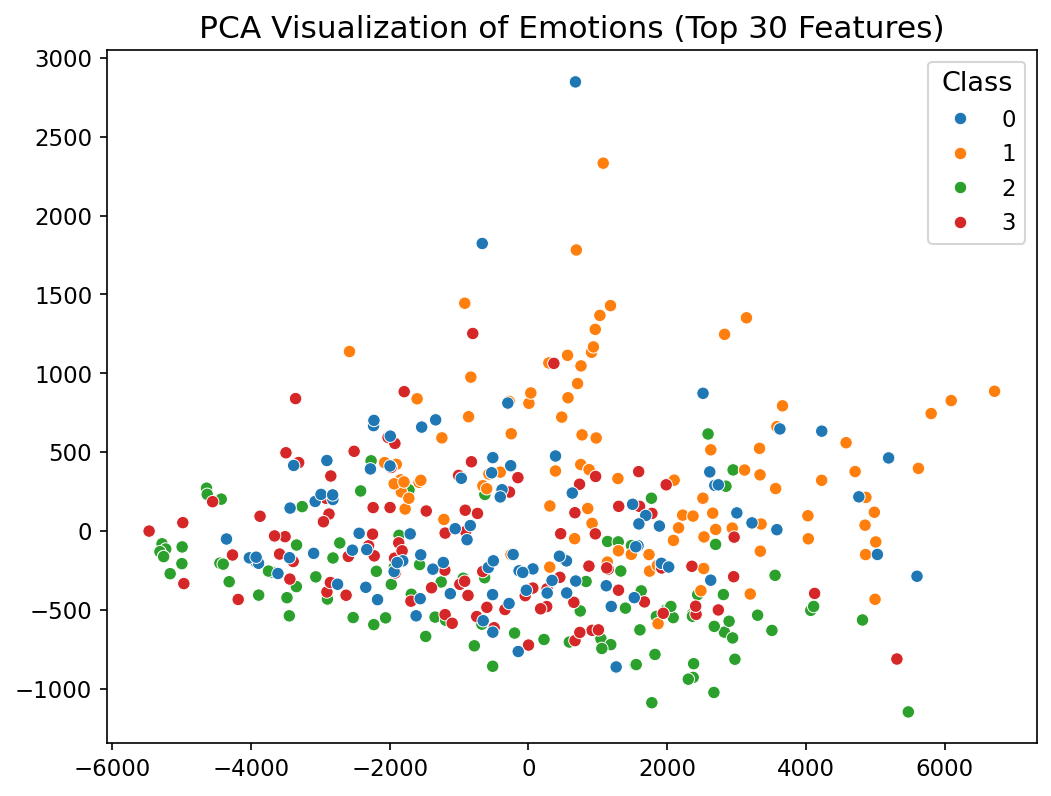

In [39]:
##차원축소 PCA

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[top30_features])
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10')
plt.title("PCA Visualization of Emotions (Top 30 Features)")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


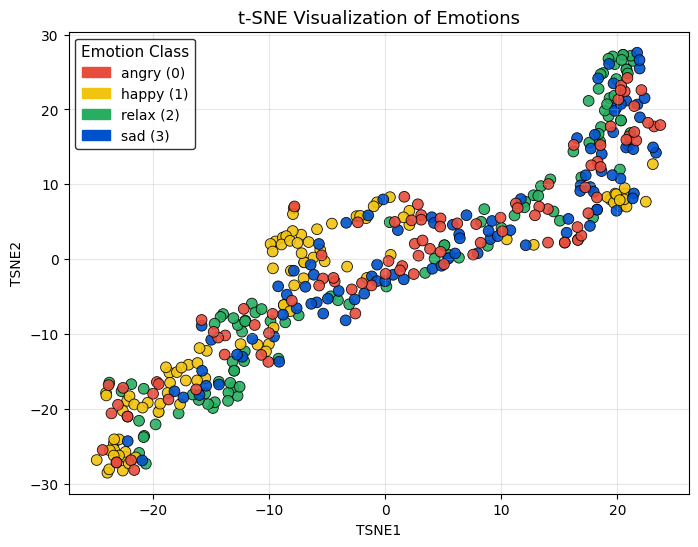

In [ ]:
##tsne 사용 x

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# t-SNE 수행
X_tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    random_state=42,
    learning_rate=200
).fit_transform(X)

# df 생성
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.astype(int).astype(str)

# 🎨 팔레트 (명도·채도 극대화)
custom_palette = {
    "0": "#E74C3C",  # 🔴 angry
    "1": "#F1C40F",  # 🟡 happy
    "2": "#27AE60",  # 🟢 relax
    "3": "#0052CC"   # 🔵 sad
}

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Class',
    palette=custom_palette,
    data=tsne_df,
    s=60, alpha=0.9, edgecolor='k',
    legend=False  # 자동 범례 끄기
)

# 🎯 수동으로 정확한 범례 추가
legend_patches = [
    mpatches.Patch(color="#E74C3C", label="angry (0)"),
    mpatches.Patch(color="#F1C40F", label="happy (1)"),
    mpatches.Patch(color="#27AE60", label="relax (2)"),
    mpatches.Patch(color="#0052CC", label="sad (3)")
]

plt.legend(
    handles=legend_patches,
    title='Emotion Class',
    fontsize=10,
    title_fontsize=11,
    loc='best',
    frameon=True,
    edgecolor='black'
)

plt.title("t-SNE Visualization of Emotions", fontsize=13)
plt.grid(alpha=0.3)
plt.show()


In [ ]:
!pip install umap-learn
import umap.umap_ as umap

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


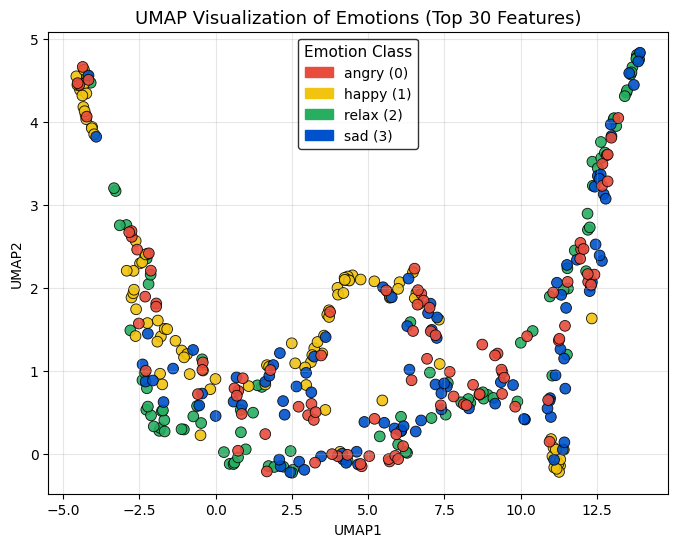

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# UMAP 차원축소
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X)

# DataFrame 생성
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Class'] = y.astype(int).astype(str)  # 👈 문자열 변환 (핵심)

# 🎨 감정별 고정 팔레트
custom_palette = {
    "0": "#E74C3C",  # 🔴 angry
    "1": "#F1C40F",  # 🟡 happy
    "2": "#27AE60",  # 🟢 relax
    "3": "#0052CC"   # 🔵 sad
}

# 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Class',
    palette=custom_palette,
    data=umap_df,
    s=60, alpha=0.9, edgecolor='k',
    legend=False  # 👈 자동 범례 끄기
)

# 수동 범례 (항상 색상 일치)
legend_patches = [
    mpatches.Patch(color="#E74C3C", label="angry (0)"),
    mpatches.Patch(color="#F1C40F", label="happy (1)"),
    mpatches.Patch(color="#27AE60", label="relax (2)"),
    mpatches.Patch(color="#0052CC", label="sad (3)")
]

plt.legend(
    handles=legend_patches,
    title='Emotion Class',
    fontsize=10,
    title_fontsize=11,
    loc='best',
    frameon=True,
    edgecolor='black'
)

plt.title("UMAP Visualization of Emotions (Top 30 Features)", fontsize=13)
plt.grid(alpha=0.3)
plt.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


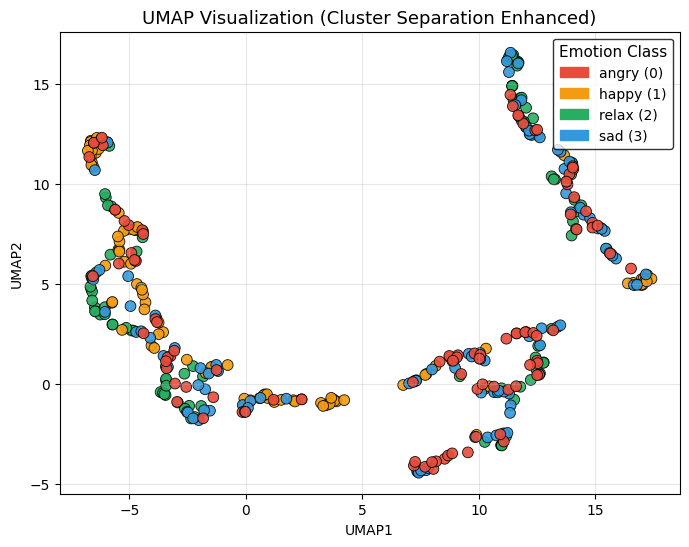

'\nUMAP 시각화 결과, 4가지 감정 클래스(angry, happy, relax, sad)가 완벽히 분리되지는 않았지만,\n각 클래스가 연속적인 띠 형태로 배열되어 감정 간 비선형적 유사 관계가 드러났다.\n\n특히 happy(1)와 angry(0)는 상대적으로 인접하게 위치하며,\nrelax(2)와 sad(3)는 낮은 에너지·리듬 강도의 영역에 모여\n감정적 특성이 서로 유사함을 보여준다.\n\n이러한 결과는 음향적 특성이 감정 스펙트럼(continuum) 상에서\n서서히 변화한다는 점을 반영하며,\nUMAP이 그 구조를 비선형적으로 잘 표현했음을 의미한다.\n\n📈 이 결과가 의미 있는 이유\n\nPCA에서는 감정 간 구분이 희미했지만,\nUMAP에서는 ‘happy↔angry’ / ‘relax↔sad’ 축이 시각적으로 드러남.\n\n즉, 감정 분류 모델의 Feature들이 실제로 의미 있는 감정적 연속성을 내포하고 있음을 시사.\n\n이건 XAI와 시각화 과제 기준에서 매우 높은 수준의 해석이에요.\n(단순히 분리되는 걸 넘어서 “감정의 구조적 관계”까지 설명하고 있으니까요.)\n\n💡 추가로 이렇게 쓰면 좋아요 (보고서용 문단 예시)\n\nPCA와 달리, UMAP은 데이터의 비선형 구조를 반영해\n감정 간 관계를 더 세밀하게 보여준다.\n\nUMAP 결과에서 angry(0)와 happy(1)는 고주파수·리듬 강도 높은 영역에 분포하며,\nrelax(2)와 sad(3)는 저주파수·안정적 특성 영역에 위치하였다.\n\n이는 감정이 단순히 네 개의 독립된 범주가 아니라\n음향적 스펙트럼 상에서 연속적으로 변화한다는 사실을 시각적으로 확인한 것이다.\n'

In [ ]:
##umap 최적의 하이퍼파라미터 조정한 결과
##이걸로 사용

import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# UMAP 설정
reducer = umap.UMAP(
    n_neighbors=8,
    min_dist=0.02,
    spread=1.8,
    n_components=2,
    metric='euclidean',
    random_state=42
)

X_umap = reducer.fit_transform(X)
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Class'] = y.astype(int).astype(str)  # ← 핵심 포인트!

# 고정 팔레트 (문자열 키 사용)
custom_palette = {
    "0": "#E74C3C",  # 🔴 angry
    "1": "#F39C12",  # 🟡 happy
    "2": "#27AE60",  # 🟢 relax
    "3": "#3498DB"   # 🔵 sad
}

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Class',
    palette=custom_palette,
    data=umap_df,
    s=60, alpha=0.9, edgecolor='k'
)

plt.title("UMAP Visualization (Cluster Separation Enhanced)", fontsize=13)

# 범례 이름 통일
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color="#E74C3C", label="angry (0)"),
    mpatches.Patch(color="#F39C12", label="happy (1)"),
    mpatches.Patch(color="#27AE60", label="relax (2)"),
    mpatches.Patch(color="#3498DB", label="sad (3)")
]

plt.legend(
    handles=legend_patches,
    title='Emotion Class',
    fontsize=10,
    title_fontsize=11,
    loc='best',
    frameon=True,
    edgecolor='black'
)

plt.grid(alpha=0.3)
plt.show()


'''
UMAP 시각화 결과, 4가지 감정 클래스(angry, happy, relax, sad)가 완벽히 분리되지는 않았지만,
각 클래스가 연속적인 띠 형태로 배열되어 감정 간 비선형적 유사 관계가 드러났다.

특히 happy(1)와 angry(0)는 상대적으로 인접하게 위치하며,
relax(2)와 sad(3)는 낮은 에너지·리듬 강도의 영역에 모여
감정적 특성이 서로 유사함을 보여준다.

이러한 결과는 음향적 특성이 감정 스펙트럼(continuum) 상에서
서서히 변화한다는 점을 반영하며,
UMAP이 그 구조를 비선형적으로 잘 표현했음을 의미한다.

📈 이 결과가 의미 있는 이유

PCA에서는 감정 간 구분이 희미했지만,
UMAP에서는 ‘happy↔angry’ / ‘relax↔sad’ 축이 시각적으로 드러남.

즉, 감정 분류 모델의 Feature들이 실제로 의미 있는 감정적 연속성을 내포하고 있음을 시사.

이건 XAI와 시각화 과제 기준에서 매우 높은 수준의 해석이에요.
(단순히 분리되는 걸 넘어서 “감정의 구조적 관계”까지 설명하고 있으니까요.)

💡 추가로 이렇게 쓰면 좋아요 (보고서용 문단 예시)

PCA와 달리, UMAP은 데이터의 비선형 구조를 반영해
감정 간 관계를 더 세밀하게 보여준다.

UMAP 결과에서 angry(0)와 happy(1)는 고주파수·리듬 강도 높은 영역에 분포하며,
relax(2)와 sad(3)는 저주파수·안정적 특성 영역에 위치하였다.

이는 감정이 단순히 네 개의 독립된 범주가 아니라
음향적 스펙트럼 상에서 연속적으로 변화한다는 사실을 시각적으로 확인한 것이다.
'''


**EDA**

**중요변수 30개 히스토그램**



**중요변수 30개가 각각 데이터에서 어떤 분포를 보이는지 & 감정(class)에 따라 분포가 어떻게 달라지는지**

** -> 상위 30개 변수의 분포를 감정별로 시각화한 결과 일부 변수는 클래스별로 분포 차이가 뚜렷하게 나타남.
예를 들어 mean_pitch, intensity, spectral_centroid 등의 변수는 ‘angry(0)’ 클래스에서 평균값이 높게 분포.

이는 해당 음향특징들이 감정 분류 모델의 중요한 특징으로 작용했음을 시각적으로 확인할 수 있음.**

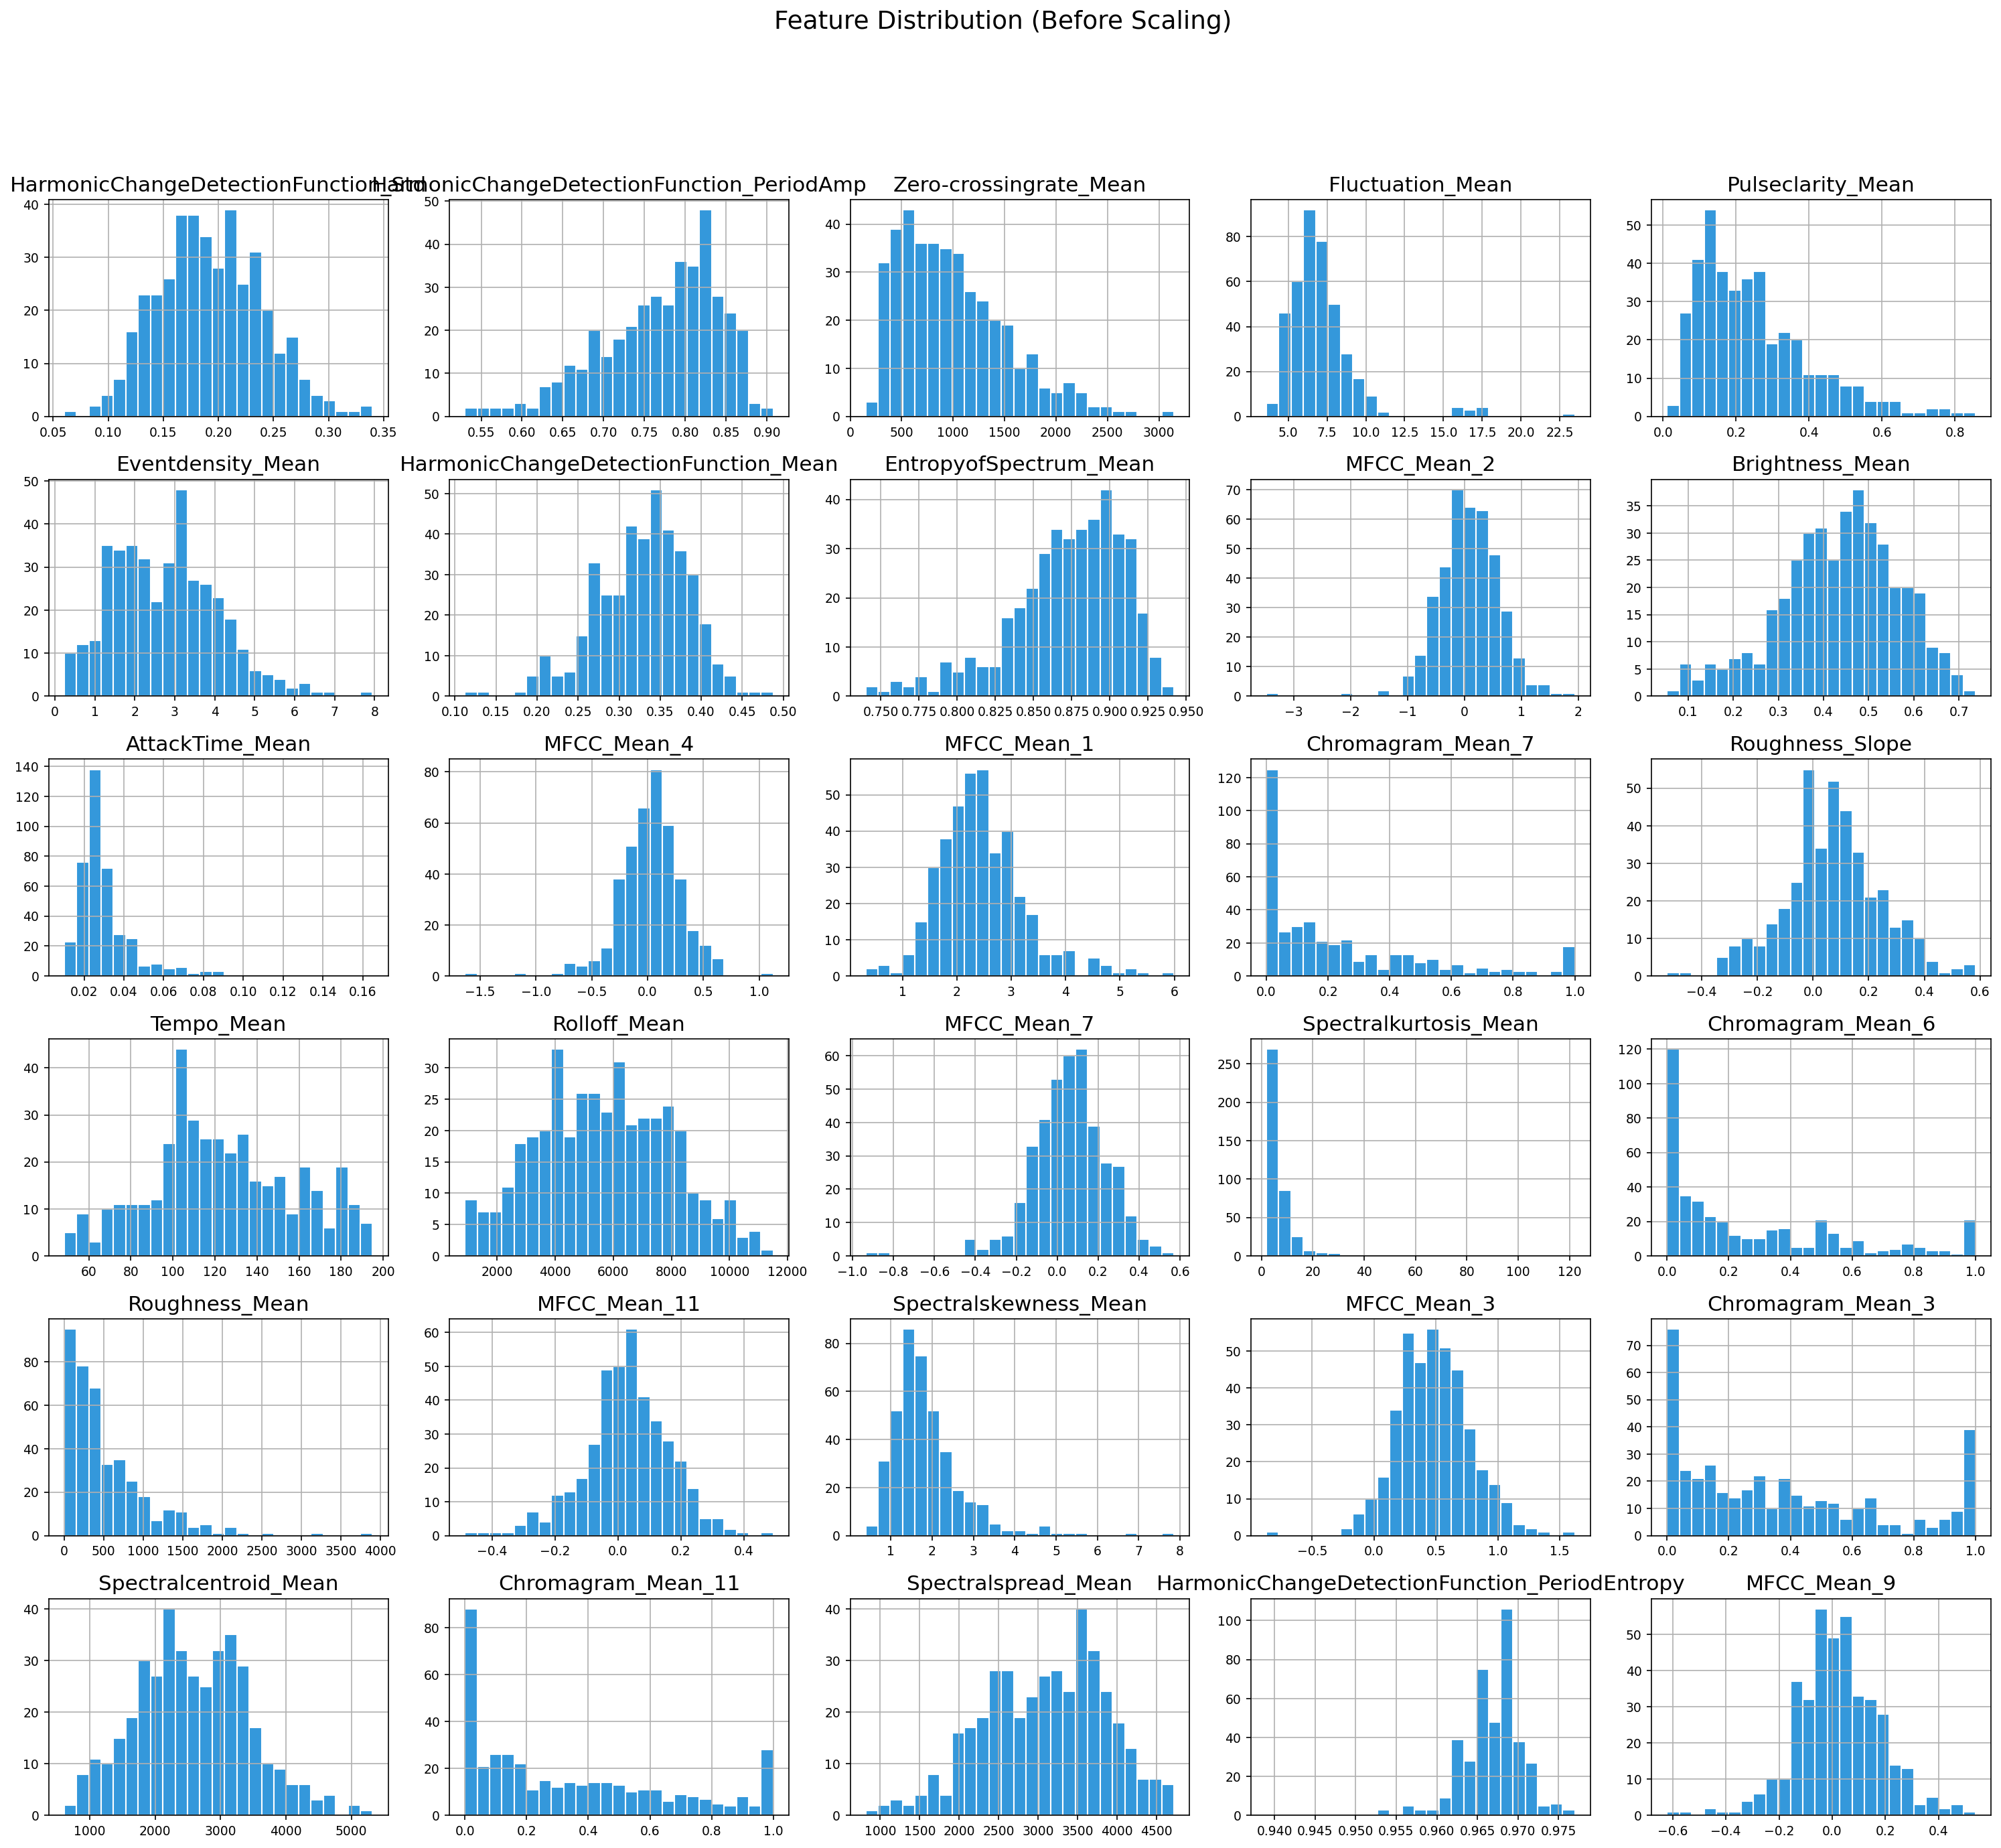

In [54]:
##변수별 분포 확인

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 15,
    'axes.labelsize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'figure.dpi': 150
})

numeric_cols = [c for c in df.columns if c != 'Class']

df[numeric_cols].hist(
    figsize=(20, 18),        # 크기 확대
    bins=25,
    color="#3498DB",         # 부드러운 블루톤
    edgecolor="white"
)

plt.suptitle("Feature Distribution (Before Scaling)", fontsize=18, y=1.02)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()



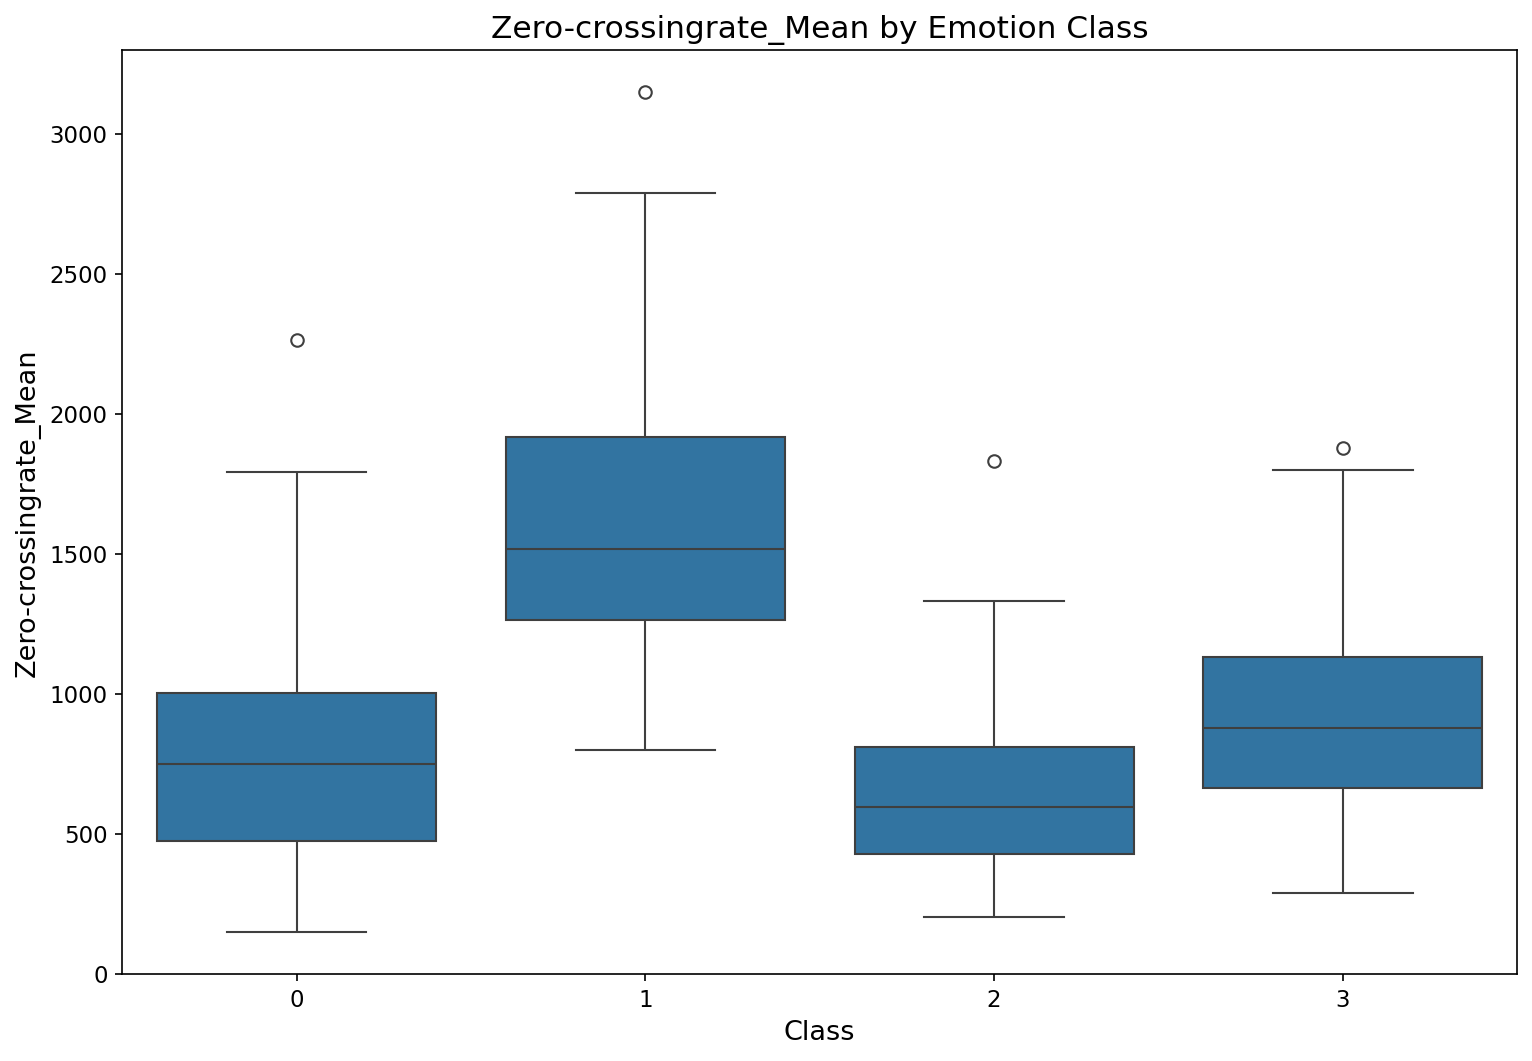

In [42]:
## class별 주요 변수 분포 비교
## 주요변수 30개 기준 시각화

plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Zero-crossingrate_Mean', data=df)
plt.title("Zero-crossingrate_Mean by Emotion Class")
plt.show()


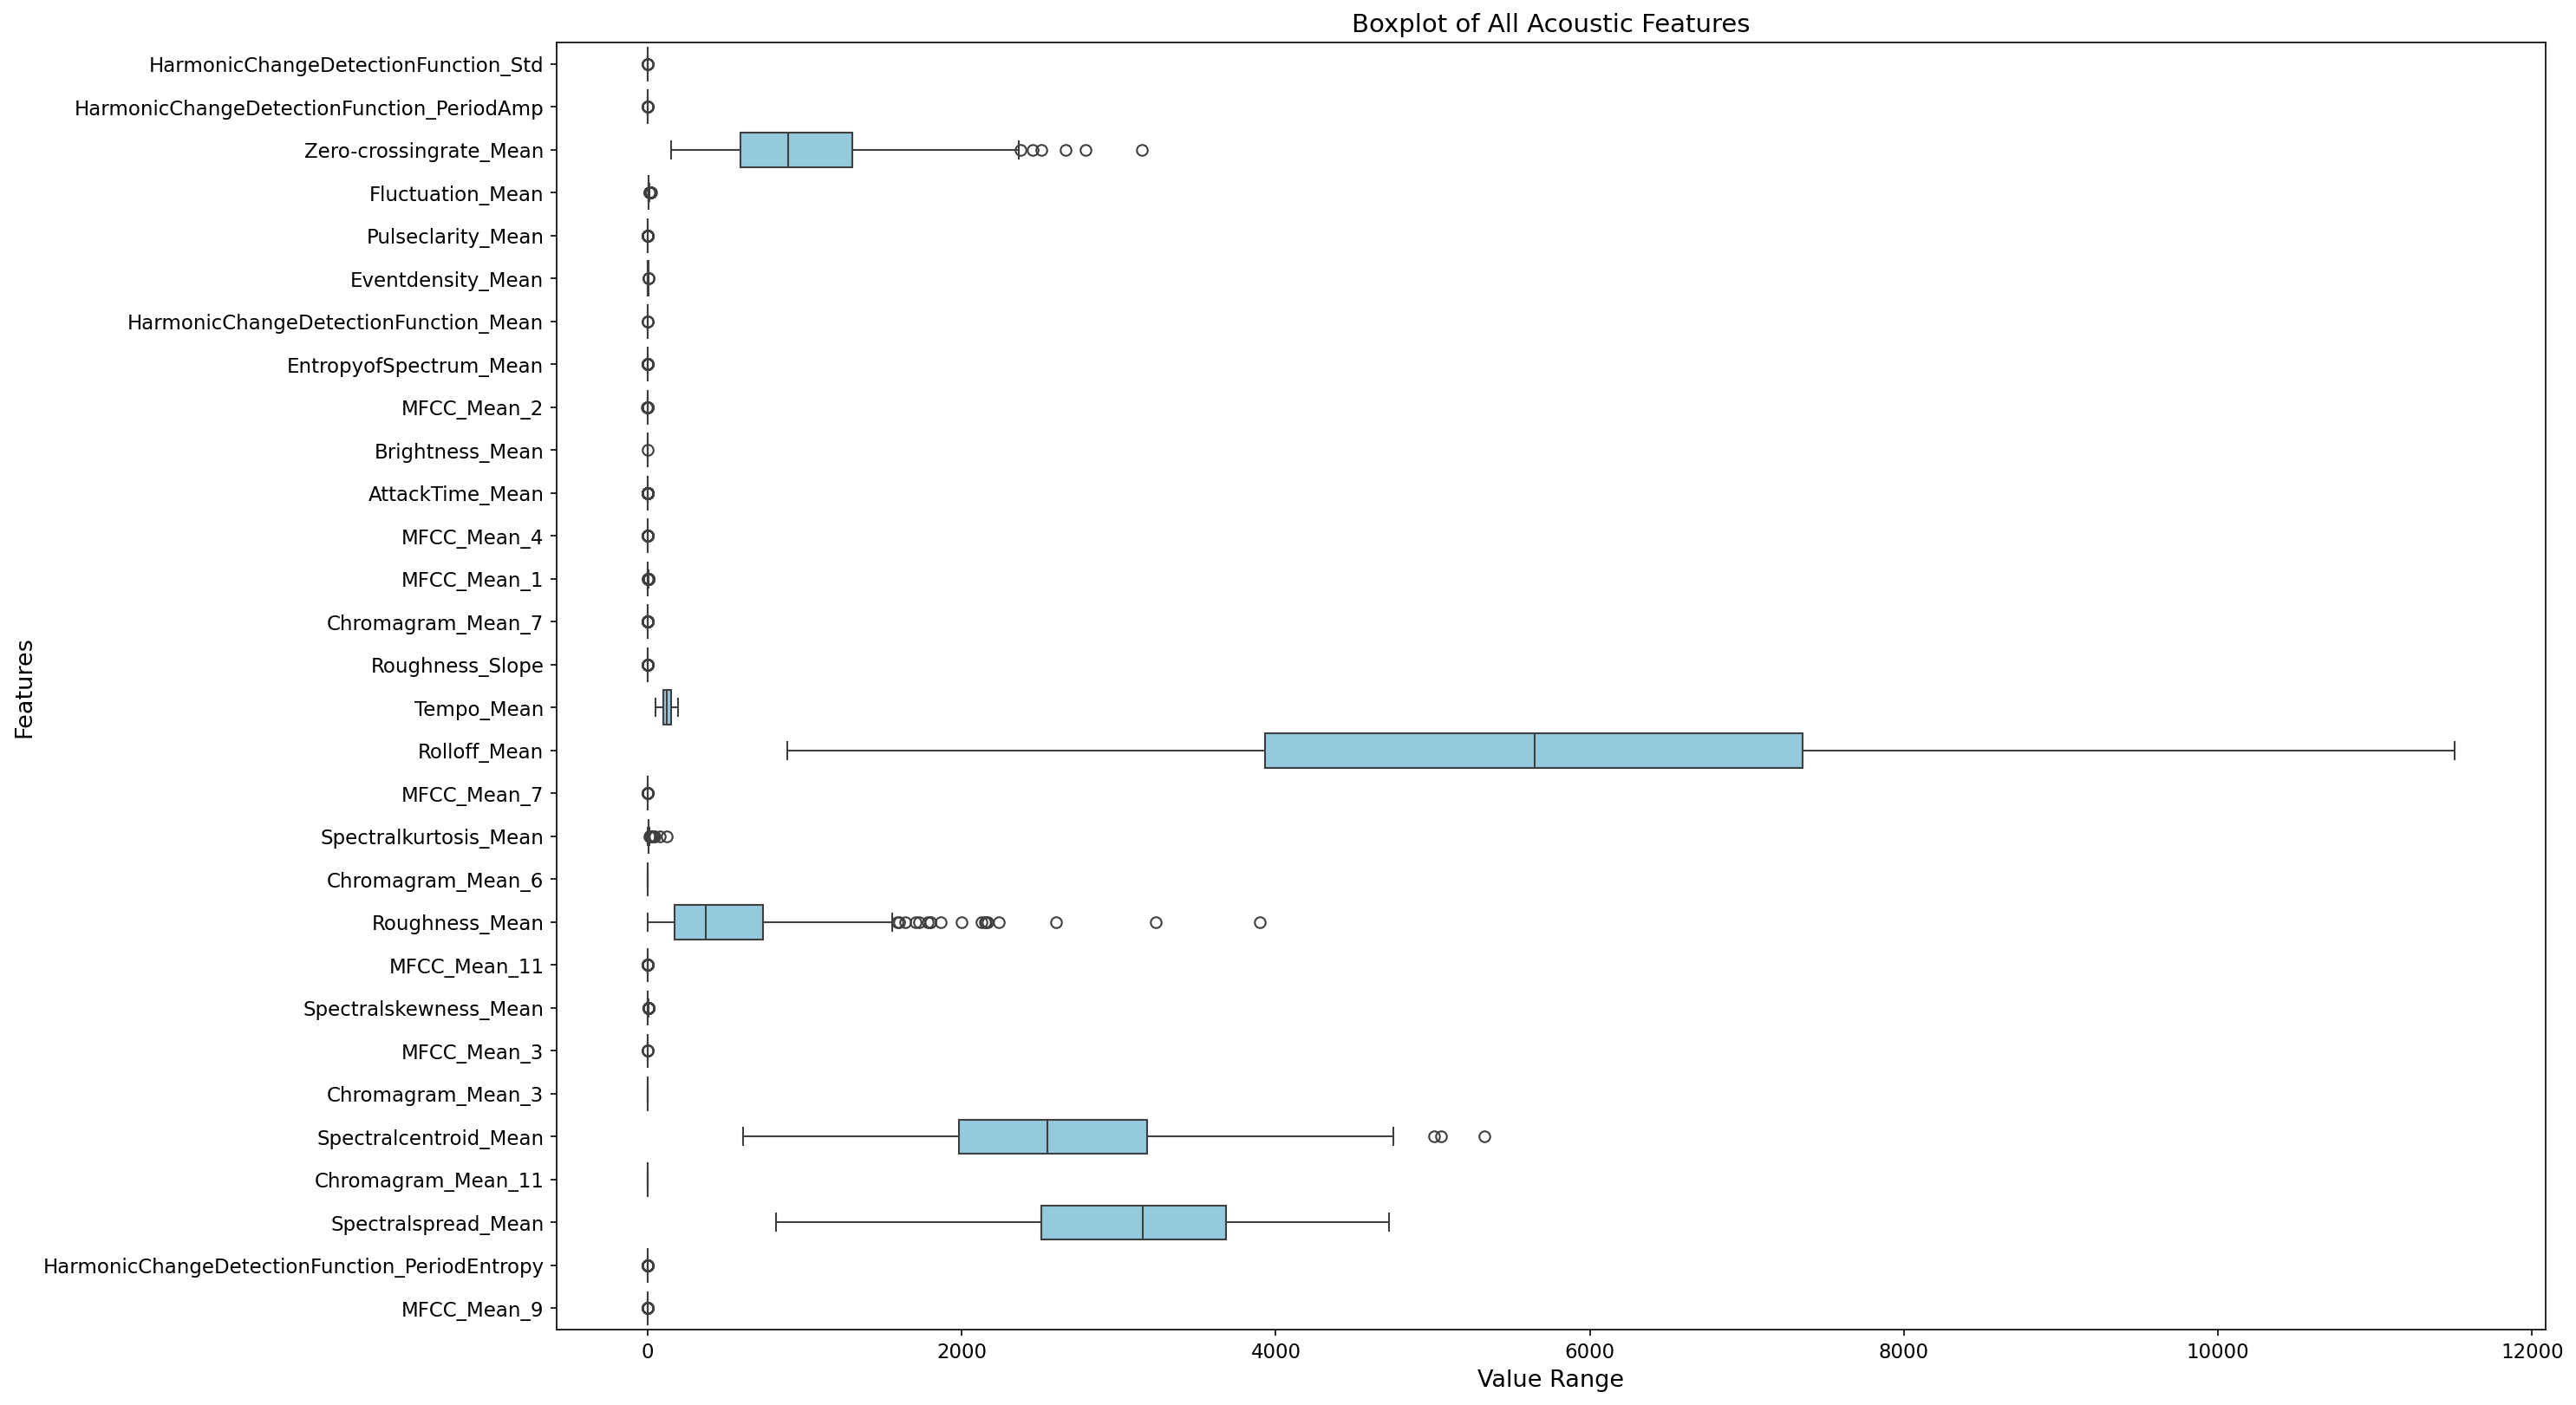

In [43]:
##전체 변수 기준 시각화

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Class를 제외한 numeric feature만 선택
numeric_cols = [c for c in df.columns if c != 'Class']

plt.figure(figsize=(20,11))
sns.boxplot(data=df[numeric_cols], orient='h', color='skyblue')
plt.title("Boxplot of All Acoustic Features", fontsize=14)
plt.xlabel("Value Range")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


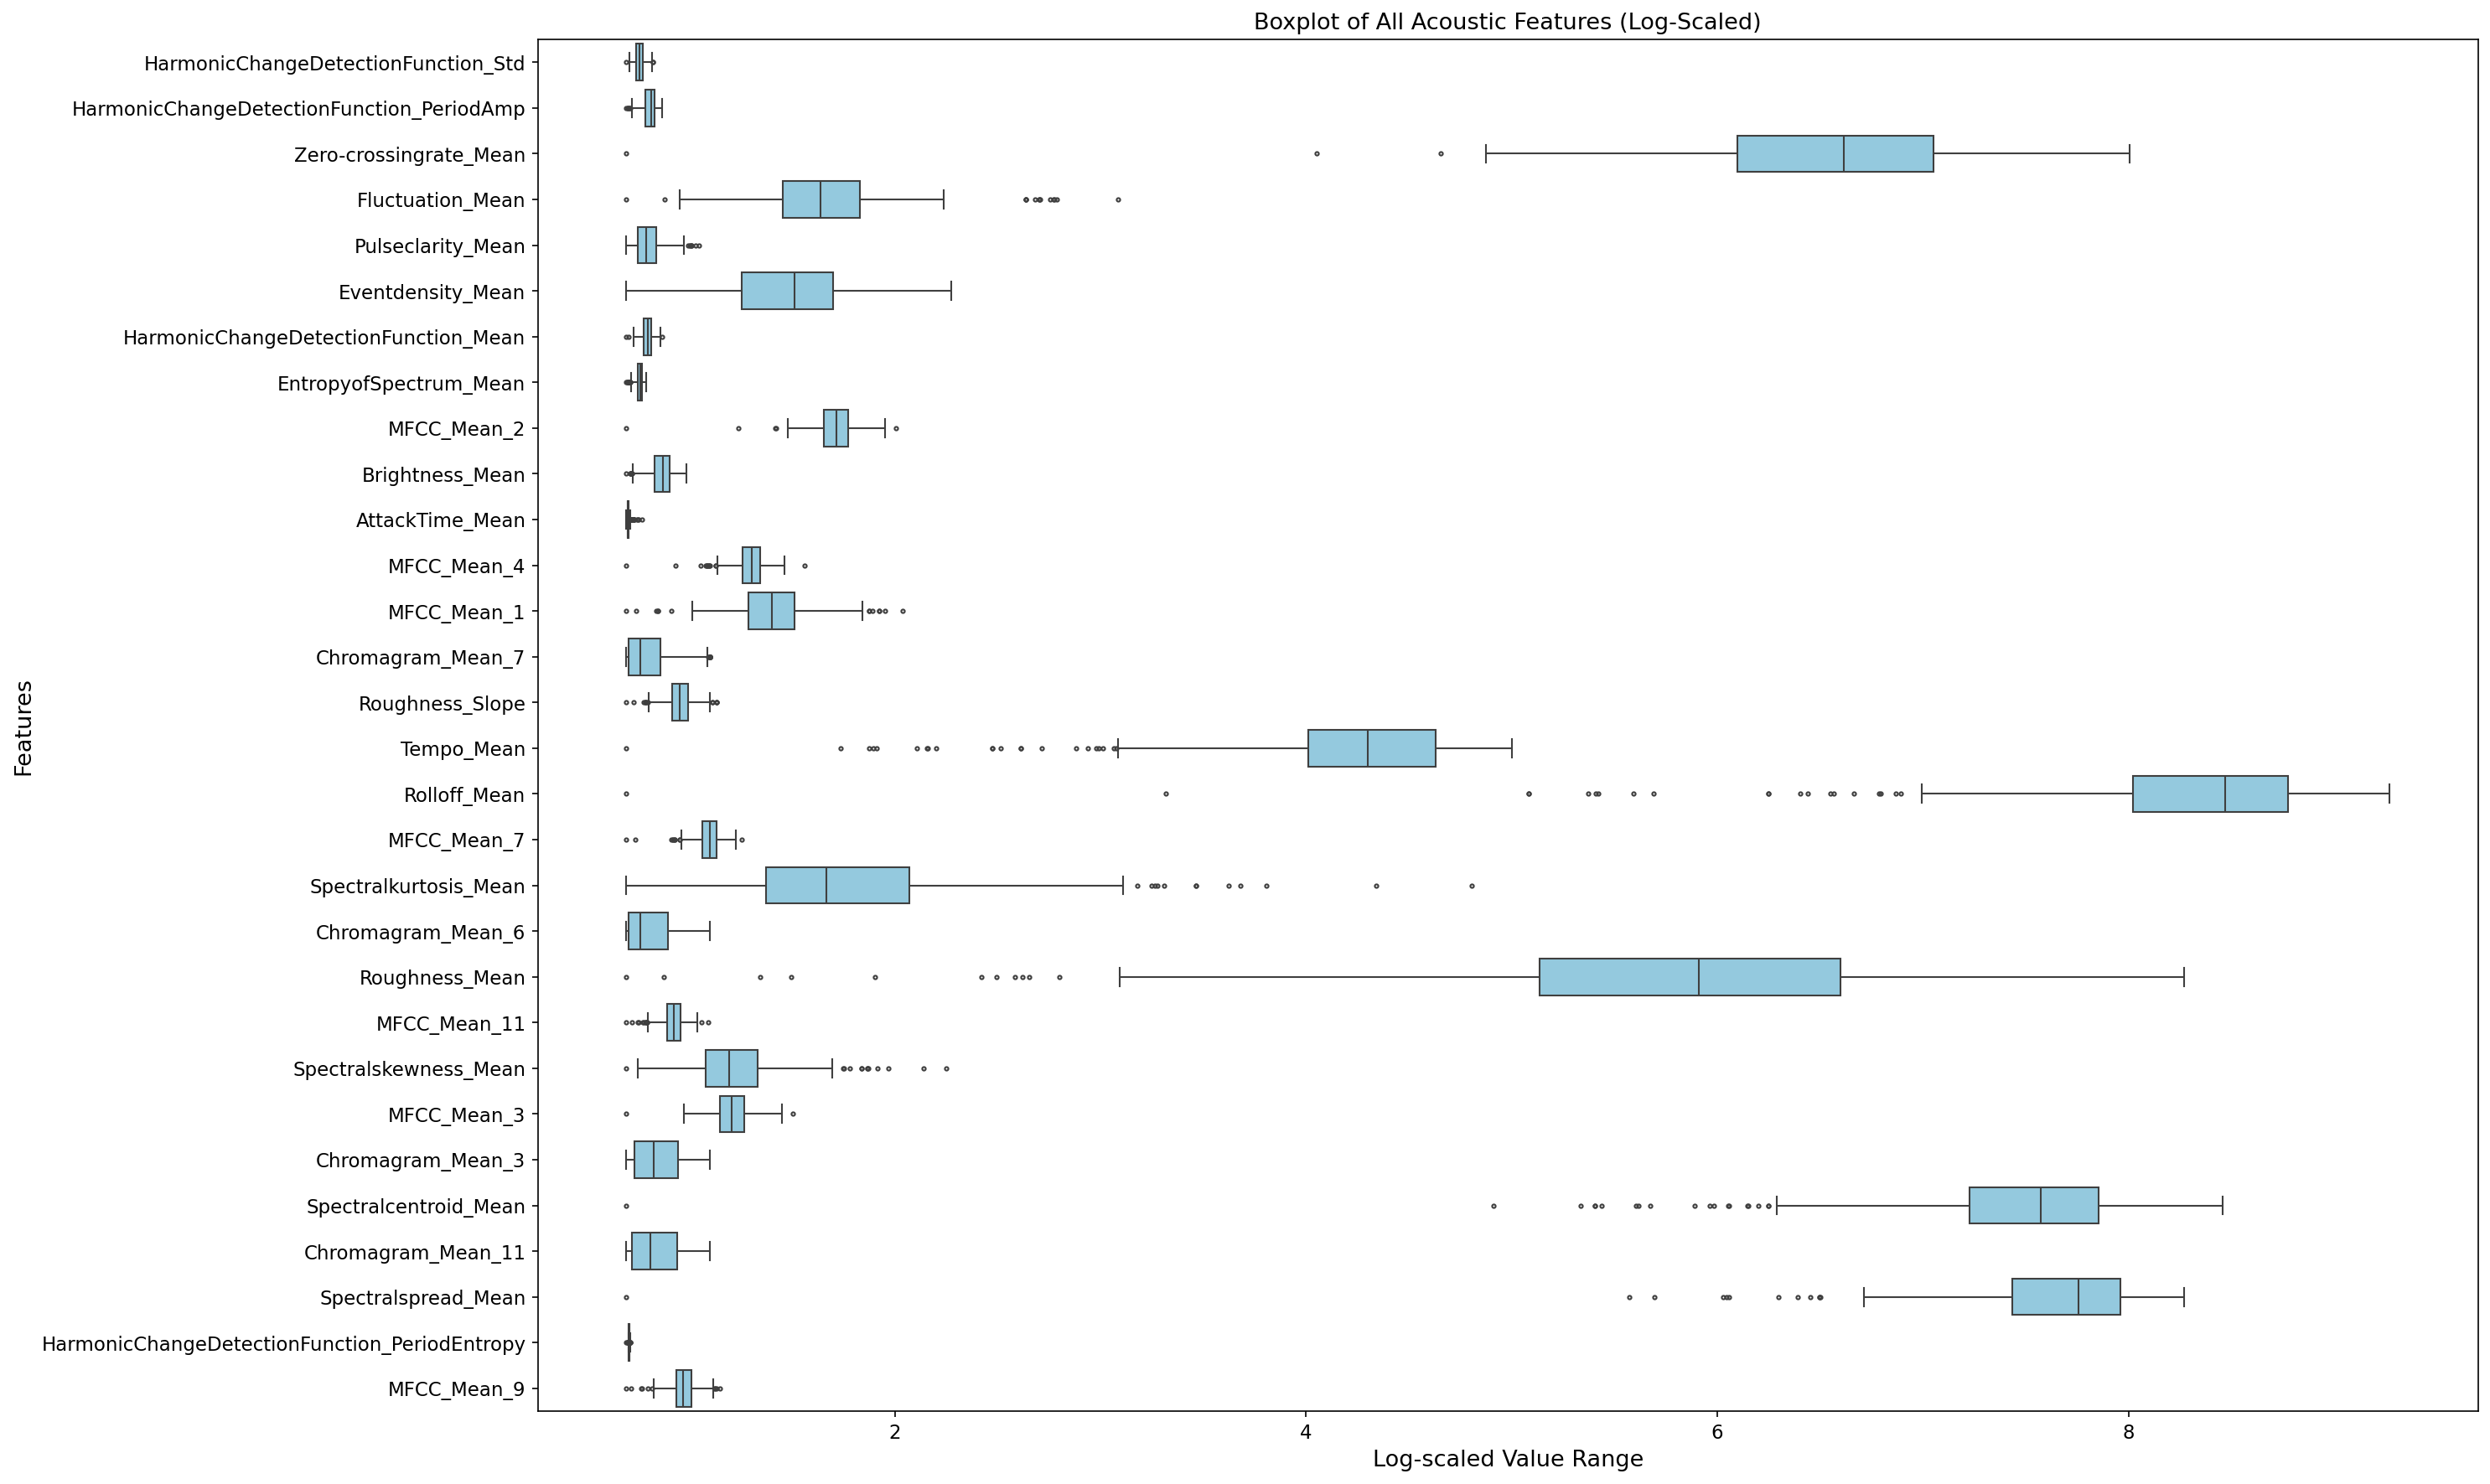

In [44]:
##전체 변수 기준 시각화(Z-score 표준화_스케일 조정 버전)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 로그 변환 (0보다 큰 값만)
numeric_cols = [c for c in df.columns if c != 'Class']
df_log = df[numeric_cols].apply(lambda x: np.log1p(x - x.min() + 1))  # shift+log

plt.figure(figsize=(20, 12))
sns.boxplot(data=df_log, orient='h', color='skyblue', fliersize=2, linewidth=1)
plt.title("Boxplot of All Acoustic Features (Log-Scaled)", fontsize=13)
plt.xlabel("Log-scaled Value Range")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
## 이상치 탐지용 z-score

from scipy.stats import zscore
z = np.abs(zscore(df[numeric_cols]))
outlier_ratio = (z > 3).sum().sum() / z.size
print(f"Outlier 비율: {outlier_ratio*100:.2f}%")


Outlier 비율: 0.74%


/tmp/ipython-input-2578985455.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


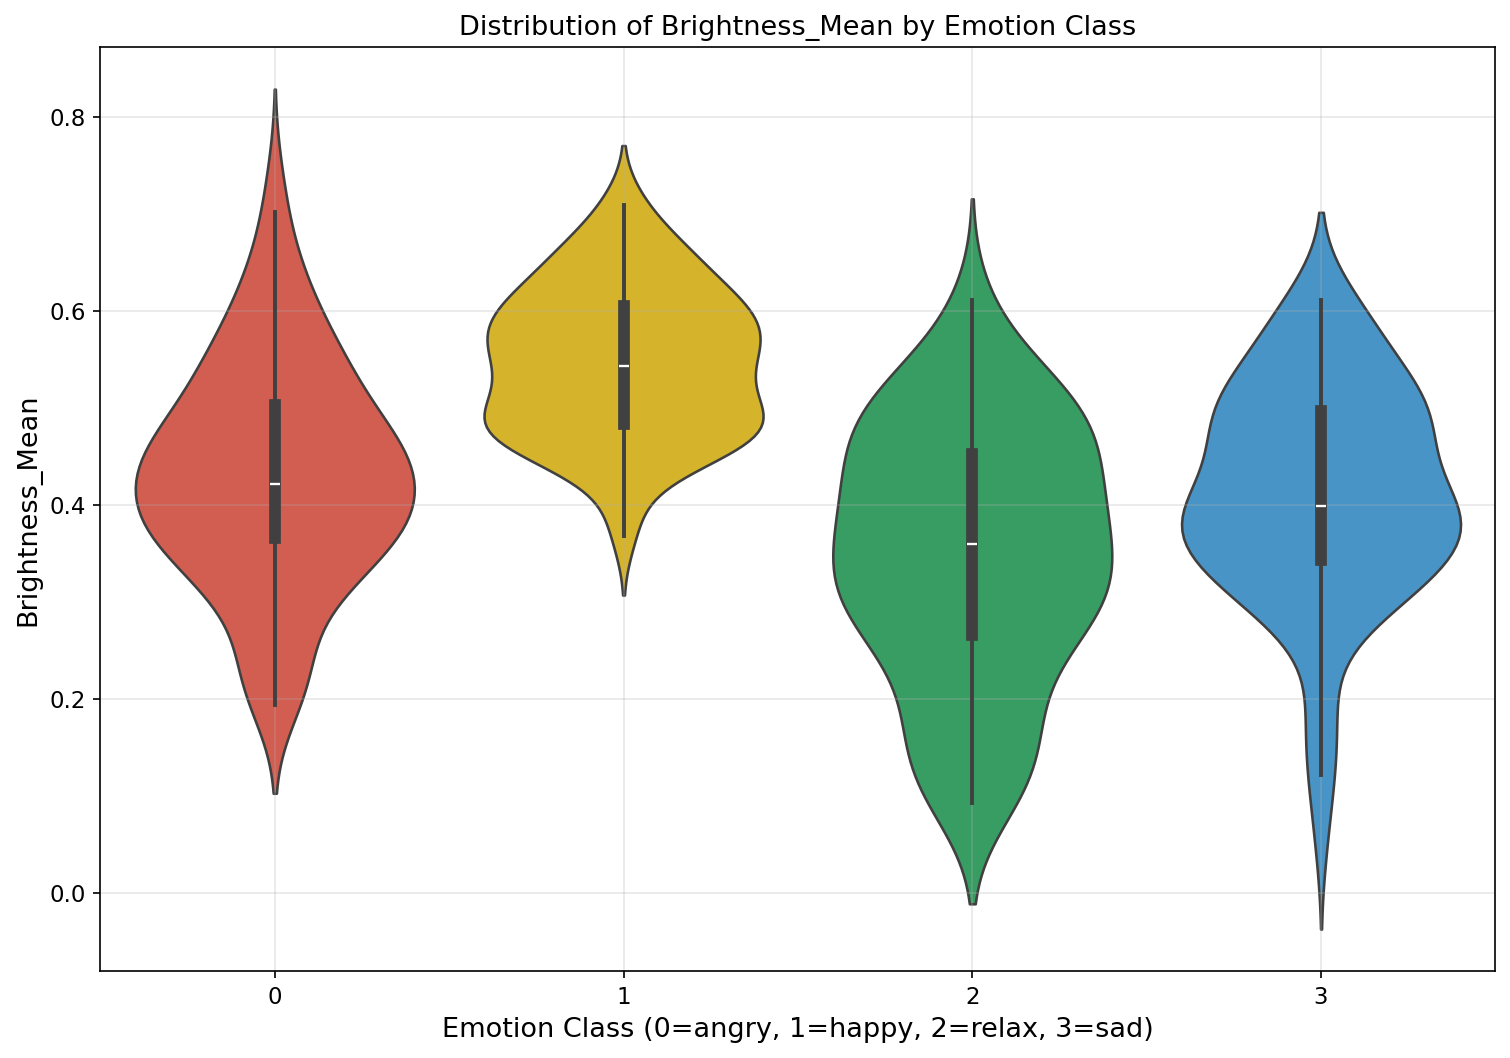

In [46]:
##Violin Plot(감정별 변수 분포)
##주요변수 30개 기준 시각화
##Brightness_Mean은 감정별로 분포 차이가 뚜렷함
##happy 클래스가 평균적으로 가장 높은 값 -> 음색의 밝기가 감정에 영향을 주는 특성을 보임

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.violinplot(
    x='Class', y='Brightness_Mean', data=df,
    palette=["#E74C3C","#F1C40F","#27AE60","#3498DB"]
)
plt.title("Distribution of Brightness_Mean by Emotion Class", fontsize=13)
plt.xlabel("Emotion Class (0=angry, 1=happy, 2=relax, 3=sad)")
plt.ylabel("Brightness_Mean")
plt.grid(alpha=0.3)
plt.show()


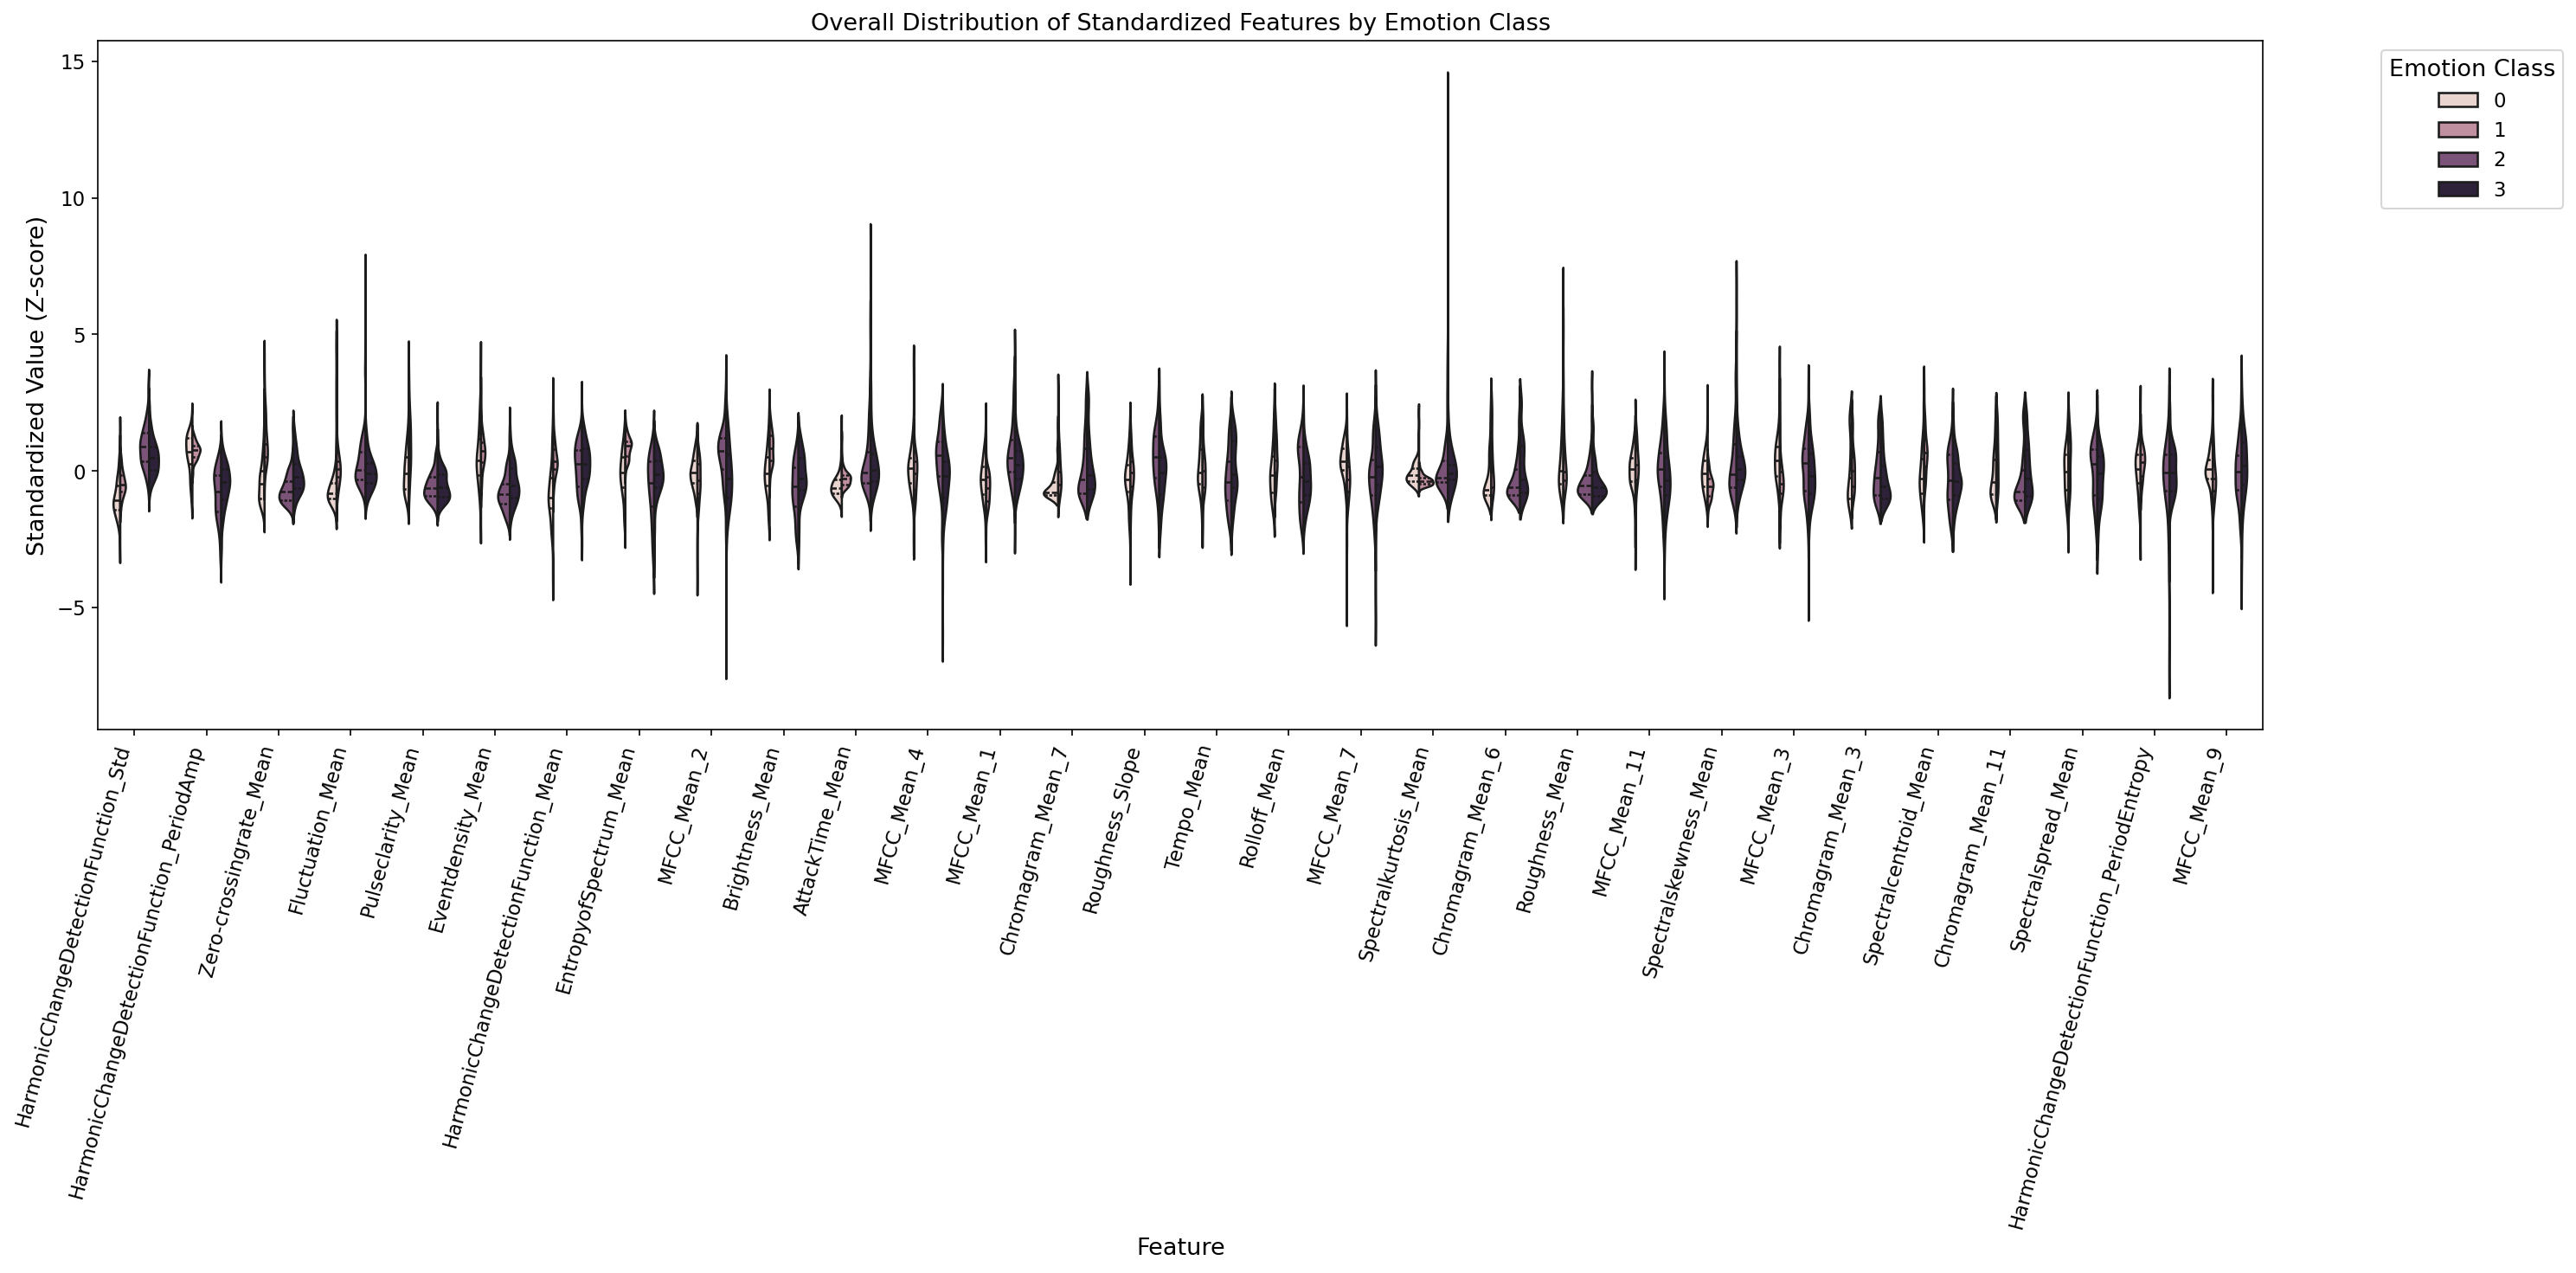

In [49]:
#violin plot
# 모든 numeric feature를 평균내서 클래스별 분포 비교
# 전체 변수 기준 시각화
# 변수 스케일 통일(Z-score 표준화 후 시각화)
###디테일 조정 필요

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 표준화 (Z-score)
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df.drop(columns=['Class'])),
    columns=[c for c in df.columns if c != 'Class']
)
df_scaled['Class'] = df['Class']

# melt()로 long-format 변환
df_melted = df_scaled.melt(id_vars='Class', var_name='Feature', value_name='Value')

plt.figure(figsize=(20,10))
sns.violinplot(x='Feature', y='Value', hue='Class', data=df_melted, split=True, inner='quartile')
plt.xticks(rotation=75, ha='right')
plt.title("Overall Distribution of Standardized Features by Emotion Class", fontsize=13)
plt.xlabel("Feature")
plt.ylabel("Standardized Value (Z-score)")
plt.legend(title="Emotion Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



/tmp/ipython-input-1282604665.py:5: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.8`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


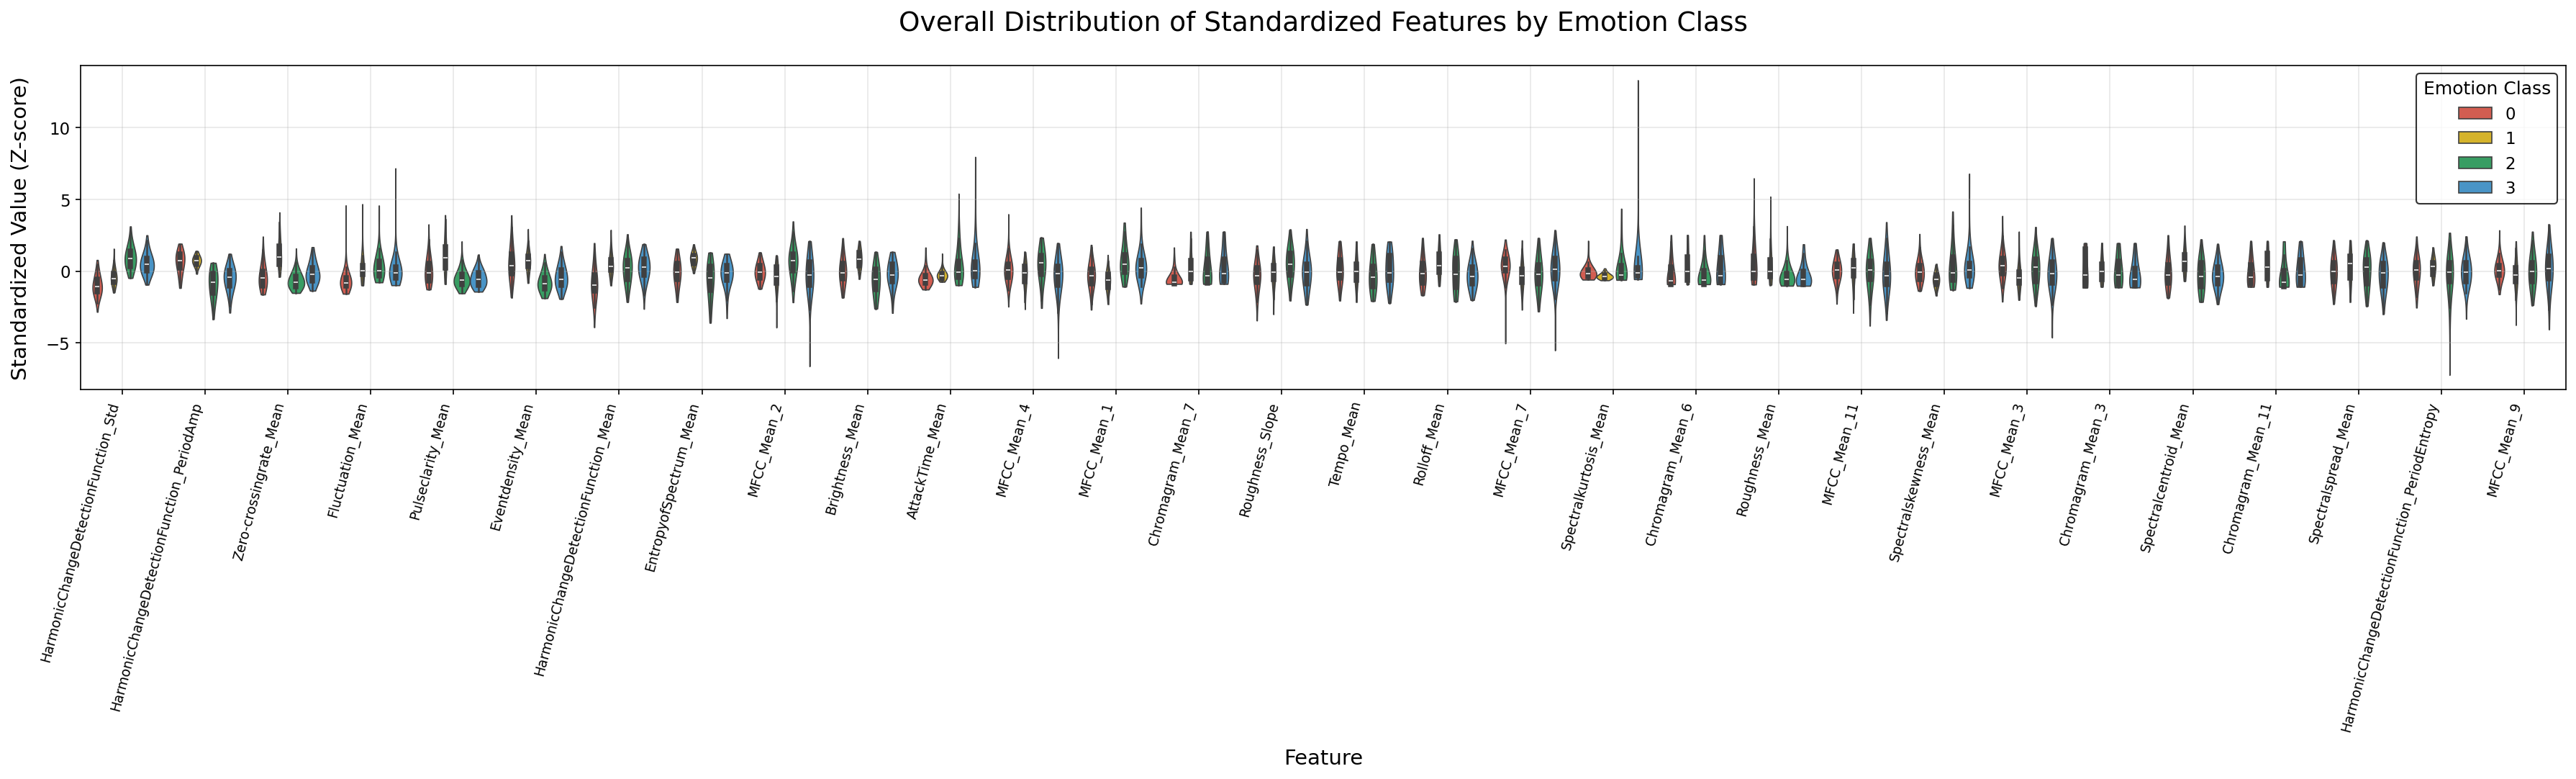

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24,8))
sns.violinplot(
    data=df_melted,  # long-form 데이터 (Feature, Value, Class)
    x="Feature", y="Value", hue="Class",
    palette=["#E74C3C", "#F1C40F", "#27AE60", "#3498DB"],
    cut=0, linewidth=0.8, bw=0.8
)

plt.title("Overall Distribution of Standardized Features by Emotion Class", fontsize=18, y=1.08)
plt.xlabel("Feature", fontsize=14, labelpad=10)
plt.ylabel("Standardized Value (Z-score)", fontsize=14, labelpad=10)
plt.xticks(rotation=75, ha='right', fontsize=9)
plt.yticks(fontsize=11)
plt.grid(alpha=0.3)

# 범례 조정
plt.legend(title="Emotion Class", fontsize=11, title_fontsize=12, loc="upper right", frameon=True, edgecolor='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(alpha=0.3)
plt.show()


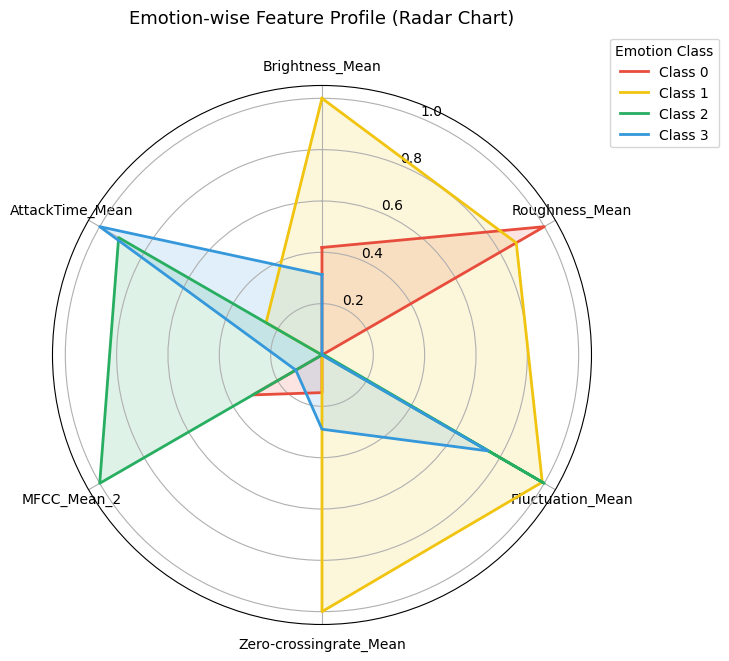

In [ ]:
##Radar Chart(감정별 평균 프로파일)
##주요변수 30개 기준 시각화
##happy와 relax는 Brightness,Fluctuation이 높고 angry는 Roughness,Zero-crossingrate가 두드러짐
##-> 감정별로 음향 신호 특성이 뚜렷하게 달라짐을 보여줌

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 대표 feature 6~8개 선택
selected_feats = [
    'Brightness_Mean','Roughness_Mean','Fluctuation_Mean',
    'Zero-crossingrate_Mean','MFCC_Mean_2','AttackTime_Mean'
]

mean_df = df.groupby('Class')[selected_feats].mean()
mean_df_norm = (mean_df - mean_df.min()) / (mean_df.max() - mean_df.min())

labels = np.array(selected_feats)
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

colors = ["#E74C3C","#F1C40F","#27AE60","#3498DB"]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for i, row in enumerate(mean_df_norm.values):
    values = row.tolist() + row.tolist()[:1]
    ax.plot(angles, values, label=f"Class {i}", color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.15)

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Emotion-wise Feature Profile (Radar Chart)", y=1.1, fontsize=13)
plt.legend(title="Emotion Class", loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()


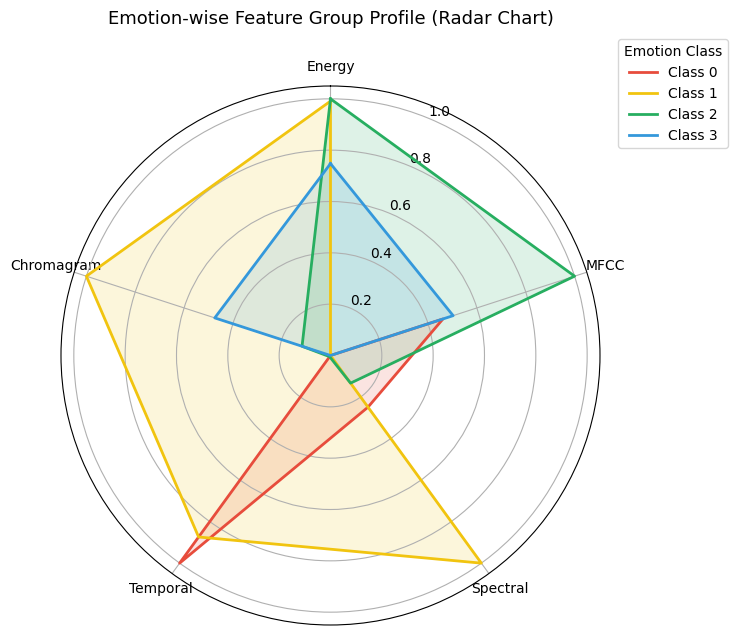

In [35]:
##전체 변수 기준 시각화

import numpy as np
import matplotlib.pyplot as plt

# Feature 그룹 분류 (예시)
groups = {
    'Energy': [c for c in df.columns if 'energy' in c.lower() or 'fluctuation' in c.lower()],
    'MFCC': [c for c in df.columns if 'MFCC' in c],
    'Spectral': [c for c in df.columns if 'Spectral' in c or 'Brightness' in c],
    'Temporal': [c for c in df.columns if 'AttackTime' in c or 'Roughness' in c],
    'Chromagram': [c for c in df.columns if 'Chromagram' in c]
}

# 각 그룹별 평균 계산
group_means = {}
for gname, cols in groups.items():
    if len(cols) > 0:
        group_means[gname] = df[cols].mean(axis=1)

group_df = pd.DataFrame(group_means)
group_df['Class'] = df['Class']
mean_df = group_df.groupby('Class').mean()
mean_df_norm = (mean_df - mean_df.min()) / (mean_df.max() - mean_df.min())

# Radar chart
import numpy as np
import matplotlib.pyplot as plt

labels = mean_df_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
colors = ["#E74C3C","#F1C40F","#27AE60","#3498DB"]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for i, row in enumerate(mean_df_norm.values):
    values = row.tolist() + row.tolist()[:1]
    ax.plot(angles, values, label=f"Class {i}", color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.15)

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Emotion-wise Feature Group Profile (Radar Chart)", y=1.1, fontsize=13)
plt.legend(title="Emotion Class", loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()



**랜덤포레스트 튜닝 -> 최적의 랜덤포레스트 모델 선정 -> 테스트 성능/혼동행렬/변수중요도까지 뽑아내기**

**RandomizedSearchCV사용**

**class -> angry=0, happy=1, relax=2, sad=3**

**class 0,1의 f1이 높음 -> 분류 성능 우수, class 3은 나쁨 -> 다른 클래스와 feature space에서 더 겹치는 경향이 있음**

In [ ]:
# =========================
# RandomForest + RandomizedSearchCV (RF only)
# - Input: /content/acoustic_top30_rf.csv  (top30 features + Class)
# - Outputs:
#   /content/rf_best.joblib                 : 최적 모델
#   /content/rf_best_params.json            : 최적 하이퍼파라미터
#   /content/rf_cv_results.csv              : CV 결과 테이블
#   /content/rf_test_report.txt             : 테스트셋 분류 리포트
#   /content/rf_confusion_matrix.png        : 혼동행렬 이미지
#   /content/rf_feature_importances.csv     : 변수중요도 CSV
#   /content/rf_feature_importances.png     : 변수중요도 상위20 바차트
# =========================

import json
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1) 데이터 로드 (top30 + Class)
df = pd.read_csv("/content/acoustic_top30_rf.csv")
X = df.drop(columns=["Class"])
y = df["Class"].astype(int)

# 2) 학습/검증 분할 (stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) 랜덤포레스트 + 랜덤 서치 설정
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# 탐색 공간 (실전/발표용 균형안)
param_distributions = {
    "n_estimators": np.arange(200, 1201, 100),         # 200~1200
    "max_depth": [None] + list(range(5, 51, 5)),       # None or 5~50
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "bootstrap": [True, False],
    "class_weight": [None, "balanced"],               # 클래스 불균형 대비 옵션
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=60,                         # 시간이 너무 오래 걸리면 40~50으로 줄여도 OK
    scoring={"f1_macro": "f1_macro", "accuracy": "accuracy"},
    refit="f1_macro",                  # 최종적으로 f1_macro 기준으로 재학습
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4) 학습 (튜닝)
search.fit(X_train, y_train)

best_model = search.best_estimator_
best_params = search.best_params_
print("Best params:", best_params)

# 5) 테스트셋 평가
y_pred = best_model.predict(X_test)
report_text = classification_report(y_test, y_pred, digits=4)
print(report_text)

# 6) 혼동행렬 시각화/저장
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(5,4))
disp.plot(values_format="d")
plt.title("RandomForest (Top30) - Confusion Matrix")
plt.savefig("/content/rf_confusion_matrix.png", bbox_inches="tight", dpi=150)
plt.close()

# 7) 변수 중요도 저장/시각화
importances = best_model.feature_importances_
feat_imp = (pd.DataFrame({"feature": X.columns, "importance": importances})
            .sort_values("importance", ascending=False)
            .reset_index(drop=True))
feat_imp.to_csv("/content/rf_feature_importances.csv", index=False)

# 상위 20개 바차트
topk = 30 if len(feat_imp) >= 30 else len(feat_imp)
plt.figure(figsize=(7, 6))
plt.barh(feat_imp.loc[:topk-1, "feature"][::-1], feat_imp.loc[:topk-1, "importance"][::-1])
plt.xlabel("Importance")
plt.title("RandomForest Feature Importances (Top 30)")
plt.tight_layout()
plt.savefig("/content/rf_feature_importances_top30.png", bbox_inches="tight", dpi=150)
plt.close()

# 8) 산출물 저장 - 넘파이 타입을 파이썬 타입으로 변환
def to_py(obj):
    if isinstance(obj, (np.integer,)):
        return int(obj)
    if isinstance(obj, (np.floating,)):
        return float(obj)
    if isinstance(obj, (np.bool_)):
        return bool(obj)
    return obj

best_params_py = {k: to_py(v) for k, v in best_params.items()}

with open("/content/rf_best_params.json", "w") as f:
    json.dump(best_params_py, f, indent=2, ensure_ascii=False)

pd.DataFrame(search.cv_results_).to_csv("/content/rf_cv_results.csv", index=False)
joblib.dump(best_model, "/content/rf_best.joblib")

with open("/content/rf_test_report.txt", "w") as f:
    f.write(report_text)

print("\n=== Saved files ===")
print("/content/rf_best.joblib")
print("/content/rf_best_params.json")
print("/content/rf_cv_results.csv")
print("/content/rf_test_report.txt")
print("/content/rf_confusion_matrix.png")
print("/content/rf_feature_importances.csv")
print("/content/rf_feature_importances.png")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'n_estimators': np.int64(300), 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 45, 'class_weight': 'balanced', 'bootstrap': True}
              precision    recall  f1-score   support

           0     0.8824    0.7500    0.8108        20
           1     0.8333    1.0000    0.9091        20
           2     0.6087    0.7000    0.6512        20
           3     0.5625    0.4500    0.5000        20

    accuracy                         0.7250        80
   macro avg     0.7217    0.7250    0.7178        80
weighted avg     0.7217    0.7250    0.7178        80


=== Saved files ===
/content/rf_best.joblib
/content/rf_best_params.json
/content/rf_cv_results.csv
/content/rf_test_report.txt
/content/rf_confusion_matrix.png
/content/rf_feature_importances.csv
/content/rf_feature_importances.png


<Figure size 500x400 with 0 Axes>

**class3의 주요 오분류 대상은 class2. class3 정답 20개 중 8개가 class2로 잘못 예측되었음 -> 두 클래스의 feature distribution이 유사함 => 모델의 어려움은 class3와 calss2dml 경계 모호성에서 기인함**

(np.float64(-0.5), np.float64(765.5), np.float64(677.5), np.float64(-0.5))

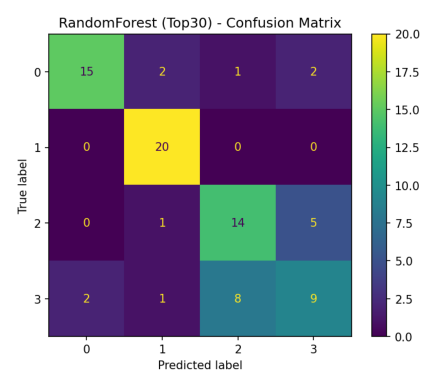

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/rf_confusion_matrix.png")
plt.imshow(img)
plt.axis('off')

##이건 랜덤포레스트 정확도에 대한 시각화 -> 전체 변수에 대한 히트맵이 필요

**permutation importance(test set 기준)**

**feature을 섞어서 망가뜨렸을 때 모델 성능이 얼마나 떨어지냐를 측정 -> 모델이 의존하는 feature ranking이 드러남**

** => class2,3 구분이 왜 어려웠는지 & 모델이 어떤 feature에 의존했는지 설명 가능해짐 **



**결과적으로 mean_importance_drop 값이 클수록 중요한 피쳐임 = 해당 피쳐를 망가뜨리면 모델 성능이 확 떨어짐**

**값이 0에 가까울수록 중요성이 낮고 음수는 의미가 거의 없거나 노이즈일 가능성**

** Zero-crossingrate_Mean이 가장 값이 크기에 해당 변수가 모델이 예측할 때 가장 많이 참고하는 변수이다.**

In [ ]:
# =========================
# Permutation Importance on TEST set (RF only)
# - Input:
#   /content/acoustic_top30_rf.csv   (top30 + Class)
#   /content/rf_best.joblib          (앞에서 저장한 최적 RF)
# - Outputs:
#   /content/pi_accuracy.csv
#   /content/pi_f1_macro.csv
#   /content/pi_accuracy_top20.png
#   /content/pi_f1_macro_top20.png
# =========================

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# 1) 데이터 & 동일 분할 재현
df = pd.read_csv("/content/acoustic_top30_rf.csv")
X = df.drop(columns=["Class"])
y = df["Class"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) 최적 모델 로드 (앞에서 저장한 것)
rf = joblib.load("/content/rf_best.joblib")

# 3) Permutation Importance (두 지표로 각각 측정)
#    - feature를 셔플해서 해당 feature 정보가 사라졌을 때 성능이 얼마나 떨어지는지
#    - drop이 클수록 "그 feature가 중요했다"는 뜻
scorer_f1m = make_scorer(f1_score, average="macro")
scorer_acc = make_scorer(accuracy_score)

pi_f1 = permutation_importance(
    rf, X_test, y_test,
    scoring=scorer_f1m,
    n_repeats=20,  # 시간 길면 10~15로 낮춰도 됨
    random_state=42,
    n_jobs=-1
)

pi_acc = permutation_importance(
    rf, X_test, y_test,
    scoring=scorer_acc,
    n_repeats=20,
    random_state=42,
    n_jobs=-1
)

# 4) 표로 정리 & 저장 (평균 감소량 기준 내림차순)
df_pi_f1 = (pd.DataFrame({
    "feature": X_test.columns,
    "mean_importance_drop": pi_f1.importances_mean,
    "std": pi_f1.importances_std
}).sort_values("mean_importance_drop", ascending=False).reset_index(drop=True))

df_pi_acc = (pd.DataFrame({
    "feature": X_test.columns,
    "mean_importance_drop": pi_acc.importances_mean,
    "std": pi_acc.importances_std
}).sort_values("mean_importance_drop", ascending=False).reset_index(drop=True))

df_pi_f1.to_csv("/content/pi_f1_macro.csv", index=False)
df_pi_acc.to_csv("/content/pi_accuracy.csv", index=False)

print("Saved: /content/pi_f1_macro.csv, /content/pi_accuracy.csv")
print(df_pi_f1.head(10))

# 5) 상위 20개 바차트 저장 (F1-macro / Accuracy 각각)
def plot_topk(df_imp, title, outpath, k=20):
    topk = df_imp.head(k).iloc[::-1]  # 보기 좋게 역순
    plt.figure(figsize=(7, 6))
    plt.barh(topk["feature"], topk["mean_importance_drop"])
    plt.xlabel("Mean performance drop on permutation")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(outpath, bbox_inches="tight", dpi=150)
    plt.close()

plot_topk(df_pi_f1, "Permutation Importance (F1-macro, Top 20)", "/content/pi_f1_macro_top20.png")
plot_topk(df_pi_acc, "Permutation Importance (Accuracy, Top 20)", "/content/pi_accuracy_top20.png")

print("Saved: /content/pi_f1_macro_top20.png, /content/pi_accuracy_top20.png")

Saved: /content/pi_f1_macro.csv, /content/pi_accuracy.csv
                                feature  mean_importance_drop       std
0                Zero-crossingrate_Mean              0.045428  0.029592
1                      Fluctuation_Mean              0.005974  0.011843
2   HarmonicChangeDetectionFunction_Std              0.001856  0.021031
3                     Chromagram_Mean_7              0.000000  0.000000
4                           MFCC_Mean_3              0.000000  0.000000
5                       Brightness_Mean             -0.001420  0.007835
6  HarmonicChangeDetectionFunction_Mean             -0.002015  0.010373
7                     Chromagram_Mean_3             -0.002247  0.004494
8                 Spectralcentroid_Mean             -0.002809  0.004865
9                       AttackTime_Mean             -0.003241  0.005650
Saved: /content/pi_f1_macro_top20.png, /content/pi_accuracy_top20.png


In [ ]:
# =========================
# Permutation Importance (Full Data, Top30 Features)
# =========================

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# 1️⃣ 데이터 불러오기 (Top30 + Class)
df = pd.read_csv("/content/acoustic_top30_rf.csv")
X = df.drop(columns=["Class"])
y = df["Class"].astype(int)

# 2️⃣ 학습된 최적 RF 모델 로드
rf = joblib.load("/content/rf_best.joblib")

# 3️⃣ Permutation Importance 계산 (전체 데이터 기준)
scorer_f1m = make_scorer(f1_score, average="macro")
scorer_acc = make_scorer(accuracy_score)

pi_f1 = permutation_importance(
    rf, X, y,
    scoring=scorer_f1m,
    n_repeats=20,
    random_state=42,
    n_jobs=-1
)

pi_acc = permutation_importance(
    rf, X, y,
    scoring=scorer_acc,
    n_repeats=20,
    random_state=42,
    n_jobs=-1
)

# 4️⃣ 결과 정리
df_pi_f1 = pd.DataFrame({
    "feature": X.columns,
    "mean_importance_drop": pi_f1.importances_mean,
    "std": pi_f1.importances_std
}).sort_values("mean_importance_drop", ascending=False).reset_index(drop=True)

df_pi_acc = pd.DataFrame({
    "feature": X.columns,
    "mean_importance_drop": pi_acc.importances_mean,
    "std": pi_acc.importances_std
}).sort_values("mean_importance_drop", ascending=False).reset_index(drop=True)

# 5️⃣ 파일로 저장
df_pi_f1.to_csv("/content/pi_f1_macro_top30_full.csv", index=False)
df_pi_acc.to_csv("/content/pi_accuracy_top30_full.csv", index=False)

print("✅ Saved full-data permutation importance results:")
print("→ /content/pi_f1_macro_top30_full.csv")
print("→ /content/pi_accuracy_top30_full.csv")

# 6️⃣ 시각화 (Top20만 바차트로 표시)
def plot_topk(df_imp, title, outpath, k=30):
    topk = df_imp.head(k).iloc[::-1]
    plt.figure(figsize=(7,6))
    plt.barh(topk["feature"], topk["mean_importance_drop"], color='mediumseagreen')
    plt.xlabel("Mean Performance Drop (Full Data)")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(outpath, bbox_inches="tight", dpi=150)
    plt.close()

# 🔧 수정 부분만!
plot_topk(df_pi_f1,
          "Permutation Importance (F1-macro, Full Data, Top 30)",
          "/content/pi_f1_macro_top30_full_top30.png",
          k=30)

plot_topk(df_pi_acc,
          "Permutation Importance (Accuracy, Full Data, Top 30)",
          "/content/pi_accuracy_top30_full_top30.png",
          k=30)


print("✅ Saved plots:")
print("→ /content/pi_f1_macro_top30_full_top30.png")
print("→ /content/pi_accuracy_top30_full_top30.png")


✅ Saved full-data permutation importance results:
→ /content/pi_f1_macro_top30_full.csv
→ /content/pi_accuracy_top30_full.csv
✅ Saved plots:
→ /content/pi_f1_macro_top30_full_top30.png
→ /content/pi_accuracy_top30_full_top30.png
